In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [4]:
order_cust = pd.read_pickle('data/order_cust.pkl')
order_cust.head()

,customer_id,sls_office_x,mid,date_id,value_bill,qty_box,real_mid,customer_group,sls_office_y,channel
0,145889,AA31,112510180,2024-12-27,25732.0,0.25,10910,WS Cosmetic,Caringin,GT
1,145909,AA31,101217695,2024-12-14,553814.0,10.00,1010512,WS 2,Caringin,GT
2,132727,AA31,131212142,2024-12-19,161700.0,2.00,20166,Retail Large,Caringin,GT
3,132727,AA31,131212142,2024-12-19,161700.0,2.00,20166,Retail,Tasikmalaya,GT
4,4373,AA31,131018985,2024-12-24,210000.0,1.00,20196,Retail Large,Caringin,GT


In [5]:
order_cust['real_mid'].nunique()

1139

In [6]:
order_cust['mid'].nunique()

1139

In [7]:
order_cust = order_cust[['date_id', 'customer_id', 'mid', 'value_bill', 'qty_box', 
                         'customer_group', 'channel']]

In [8]:
order_cust.head()

,date_id,customer_id,mid,value_bill,qty_box,customer_group,channel
0,2024-12-27,145889,112510180,25732.0,0.25,WS Cosmetic,GT
1,2024-12-14,145909,101217695,553814.0,10.00,WS 2,GT
2,2024-12-19,132727,131212142,161700.0,2.00,Retail Large,GT
3,2024-12-19,132727,131212142,161700.0,2.00,Retail,GT
4,2024-12-24,4373,131018985,210000.0,1.00,Retail Large,GT


In [9]:
cust = pd.read_pickle('data/df_cust.pkl')
cust.head()

,real_customer_id,customer_id,customer_group,sls_office,channel
0,1002085,131074,Retail Large,Caringin,GT
1,1002086,131078,WS 2,Caringin,GT
2,1002087,131080,WS 2,Caringin,GT
3,1002972,131082,WS 2,Caringin,GT
4,1003148,131086,WS 2,Caringin,GT


In [10]:
full_product = pd.read_pickle('data/full_product.pkl')
full_product.head()

,real_mid,mid,mid_desc,desc1,desc2,mg2_desc,rate_unit,cond_price_unit,base_uom,rate_avg,ukuran,satuan
0,61800,111616385,FN COLOGNE DESSERT VIOLET BTL 100ML,PERSONAL CARE,COLOGNE,COLOGNE SPRAY FRES&NATURAL BTL100ML24PCS,IDR,24.0,BOX,250911.856000,100.0,ML
1,20322,131216387,SEDAAP MIE GORENG AYAM BAKAR LIMAU 89Gr,FOOD,NOODLES,NOODLE SEDAAPMIE GORENG 40PCS 91GR,IDR,40.0,BOX,114053.693750,91.0,GR
2,1061830,121616390,DAIA POWDET CLEAN&FRESH BAG 800GR NPRG,FABRIC CARE,POWDER DETERGENT,POWDET DAIA BAG 12PCS 800GR NPRG,IDR,12.0,BOX,196200.000000,800.0,GR
3,1060153,121116393,SOKLIN PEMUTIH REGULAR BTL 500ML,FABRIC CARE,BLEACHING,BLEACHING SOKLIN BOTTLE 12PCS 500ML,IDR,12.0,BOX,73317.345333,500.0,ML
4,61229,141016395,ALE-ALE GUAVA CUP 180ML,BEVERAGE,CUP RTD,FOODRTD ALE-ALE CUP 200ML 24PCS,IDR,24.0,BOX,19750.000000,200.0,ML


# Analisis Distribusi Channel Pelanggan

In [11]:
print("Proporsi of 'GT':", (order_cust['channel'].value_counts()['GT']/len(order_cust)).round(4))

Proporsi of 'GT': 0.9571


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = order_cust.copy()

df['date_id'] = pd.to_datetime(df['date_id'])

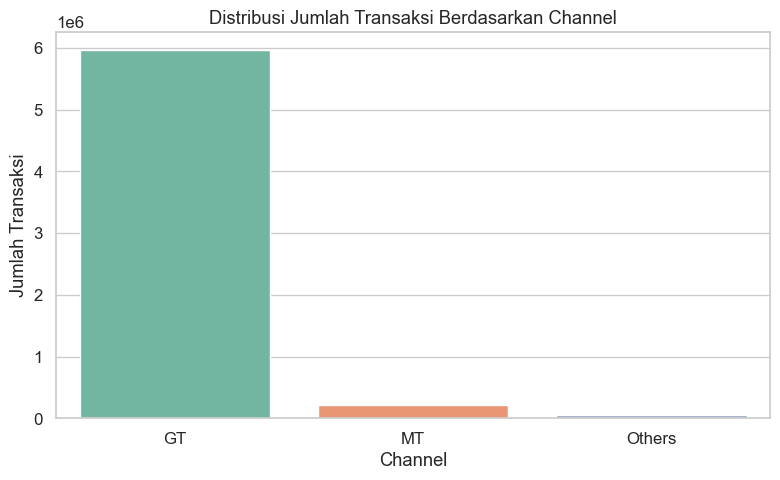

In [28]:
plt.figure(figsize=(8, 5))

channel_counts = df['channel'].value_counts()

sns.barplot(
    x=channel_counts.index,
    y=channel_counts.values,
    palette="Set2"
)

plt.title("Distribusi Jumlah Transaksi Berdasarkan Channel")
plt.xlabel("Channel")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()
plt.show()

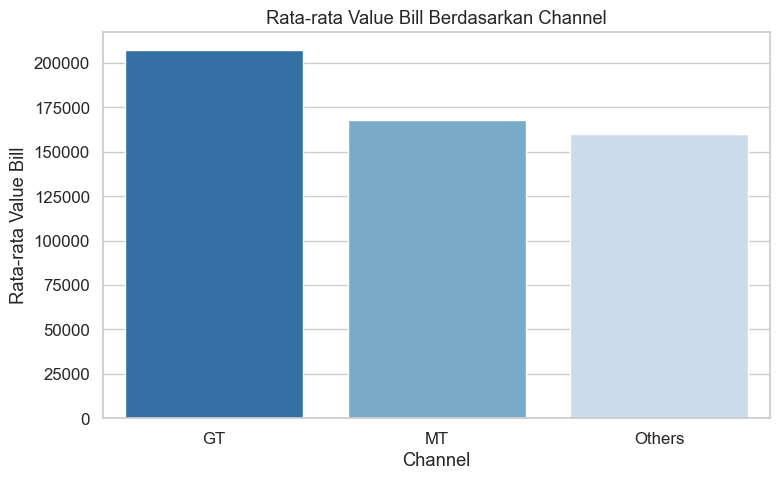

In [32]:
plt.figure(figsize=(8, 5))

avg_value = df.groupby('channel')['value_bill'].mean().sort_values(ascending=False)

sns.barplot(
    x=avg_value.index,
    y=avg_value.values,
    palette="Blues_r"
)

plt.title("Rata-rata Value Bill Berdasarkan Channel")
plt.xlabel("Channel")
plt.ylabel("Rata-rata Value Bill")
plt.tight_layout()
plt.show()

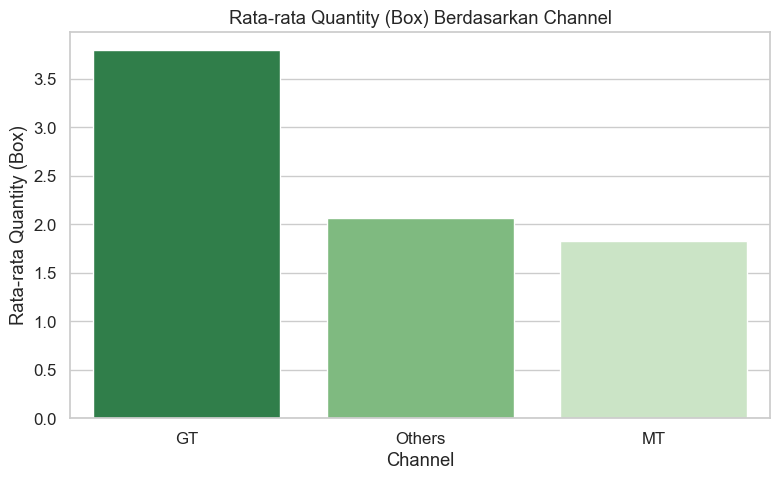

In [35]:
plt.figure(figsize=(8, 5))

avg_qty = df.groupby('channel')['qty_box'].mean().sort_values(ascending=False)

sns.barplot(
    x=avg_qty.index,
    y=avg_qty.values,
    palette="Greens_r"
)

plt.title("Rata-rata Quantity (Box) Berdasarkan Channel")
plt.xlabel("Channel")
plt.ylabel("Rata-rata Quantity (Box)")
plt.tight_layout()
plt.show()


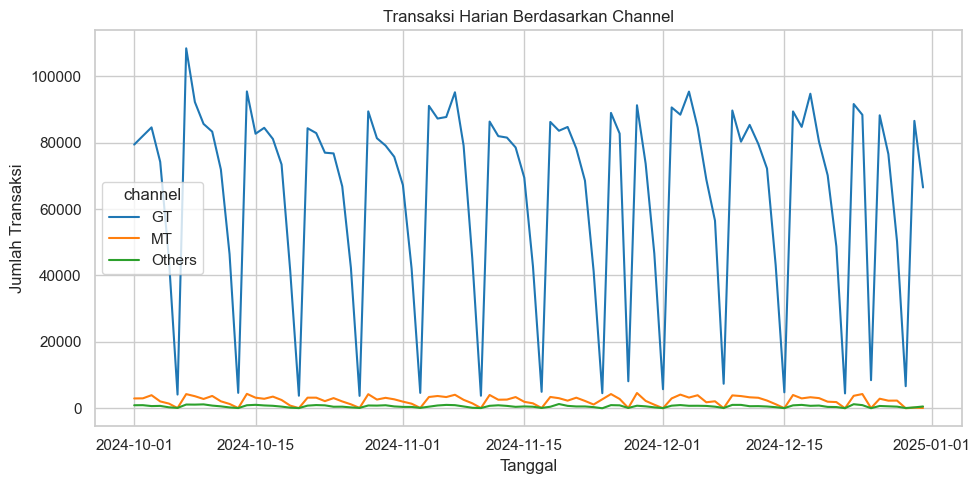

In [38]:
daily_trx = (
    df.groupby(['date_id', 'channel'])
      .size()
      .reset_index(name='transactions')
)

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=daily_trx,
    x='date_id',
    y='transactions',
    hue='channel',
    palette="tab10"
)

plt.title("Transaksi Harian Berdasarkan Channel")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid")


df['year_month'] = df['date_id'].dt.to_period('M').astype(str)

# join ke product untuk ambil Ph1 (desc1)
df = df.merge(
    full_product[['mid', 'desc1']],
    on='mid',
    how='left'
)

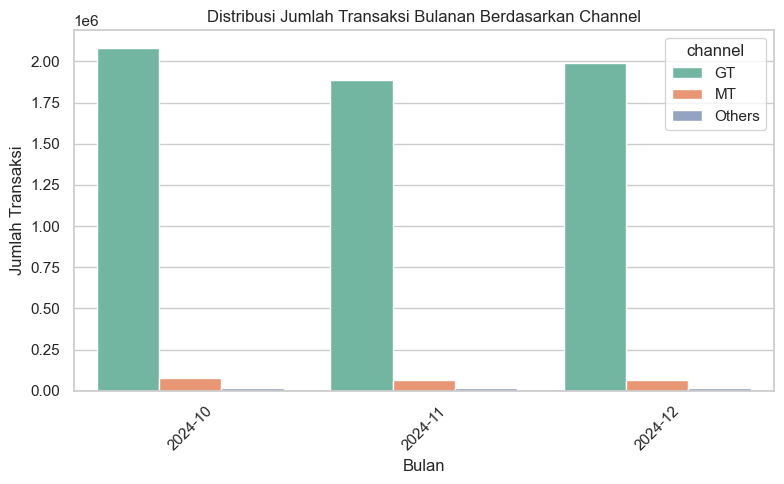

In [ ]:
monthly_channel_counts = (
    df.groupby(['year_month', 'channel'])
      .size()
      .reset_index(name='jumlah_transaksi')
)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=monthly_channel_counts,
    x='year_month',
    y='jumlah_transaksi',
    hue='channel',
    palette="Set2"
)

plt.title("Distribusi Jumlah Transaksi Bulanan Berdasarkan Channel")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

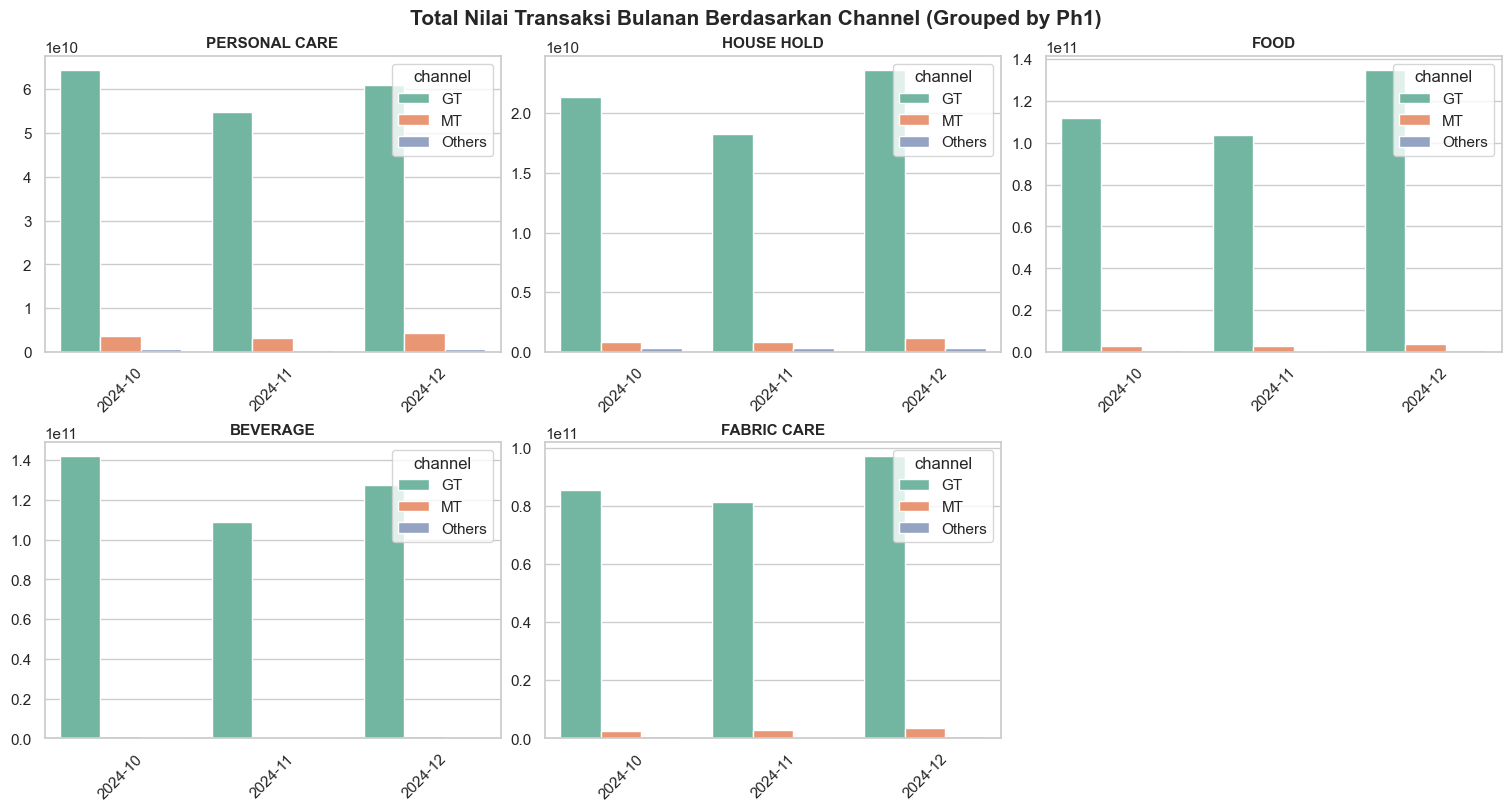

In [ ]:
desc1_list = df['desc1'].dropna().unique()
n_desc = len(desc1_list)

n_cols = 3
n_rows = math.ceil(n_desc / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 5, n_rows * 4),
    constrained_layout=True
)

axes = axes.flatten()

for i, desc in enumerate(desc1_list):
    df_desc = df[df['desc1'] == desc]

    monthly_sales_desc = (
        df_desc.groupby(['year_month', 'channel'])['value_bill']
               .sum()
               .reset_index()
    )

    sns.barplot(
        data=monthly_sales_desc,
        x='year_month',
        y='value_bill',
        hue='channel',
        palette="Set2",
        ax=axes[i]
    )

    axes[i].set_title(desc, fontsize=11, weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Total Nilai Transaksi Bulanan Berdasarkan Channel (Grouped by Ph1)",
    fontsize=15,
    weight='bold'
)

plt.show()

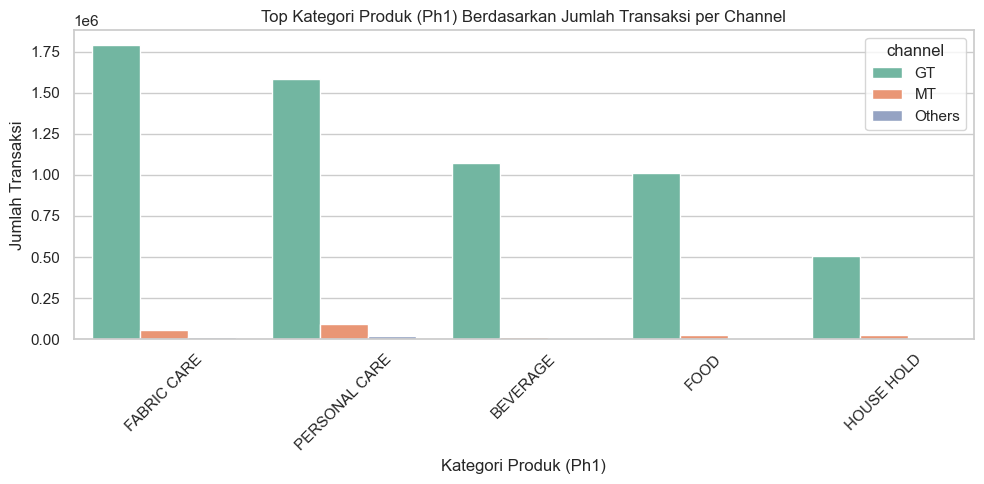

In [ ]:
# hitung jumlah transaksi per Ph1 per channel
ph1_channel_count = (
    df.groupby(['channel', 'desc1'])
      .size()
      .reset_index(name='jumlah_transaksi')
)

# ambil top 5 Ph1 per channel
top_ph1_per_channel = (
    ph1_channel_count
    .sort_values(['channel', 'jumlah_transaksi'], ascending=[True, False])
    .groupby('channel')
    .head(5)
)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=top_ph1_per_channel,
    x='desc1',
    y='jumlah_transaksi',
    hue='channel',
    palette="Set2"
)

plt.title("Top Kategori Produk (Ph1) Berdasarkan Jumlah Transaksi per Channel")
plt.xlabel("Kategori Produk (Ph1)")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


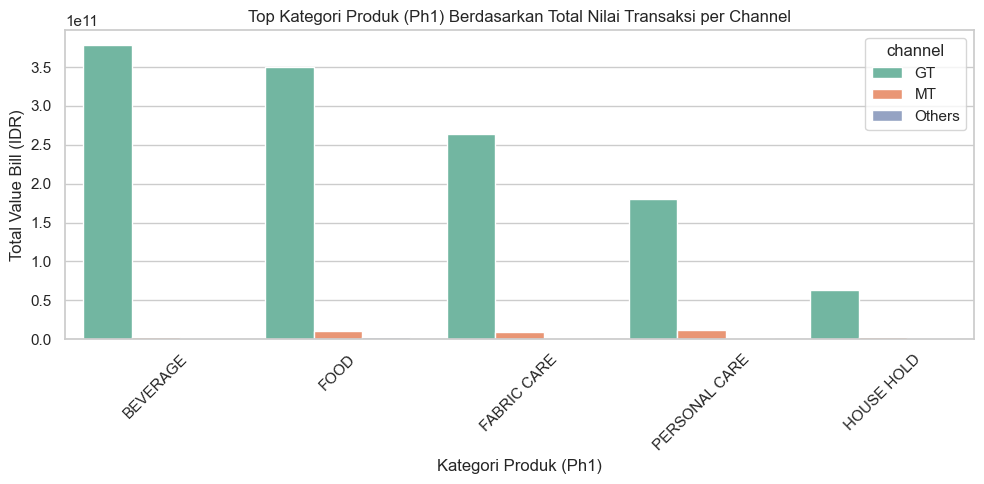

In [ ]:
# agregasi total value bill
ph1_channel_value = (
    df.groupby(['channel', 'desc1'])['value_bill']
      .sum()
      .reset_index()
)

# ambil top 5 berdasarkan nilai
top_ph1_value_per_channel = (
    ph1_channel_value
    .sort_values(['channel', 'value_bill'], ascending=[True, False])
    .groupby('channel')
    .head(5)
)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=top_ph1_value_per_channel,
    x='desc1',
    y='value_bill',
    hue='channel',
    palette="Set2"
)

plt.title("Top Kategori Produk (Ph1) Berdasarkan Total Nilai Transaksi per Channel")
plt.xlabel("Kategori Produk (Ph1)")
plt.ylabel("Total Value Bill (IDR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
ranking_ph1 = (
    ph1_channel_count
    .sort_values(['channel', 'jumlah_transaksi'], ascending=[True, False])
    .groupby('channel')
    .apply(lambda x: x.assign(rank=range(1, len(x) + 1)))
    .reset_index(drop=True)
)

ranking_ph1.head(10)


,channel,desc1,jumlah_transaksi,rank
0,GT,FABRIC CARE,1790037,1
1,GT,PERSONAL CARE,1584798,2
2,GT,BEVERAGE,1072668,3
3,GT,FOOD,1009161,4
4,GT,HOUSE HOLD,504241,5
5,MT,PERSONAL CARE,93074,1
6,MT,FABRIC CARE,54317,2
7,MT,FOOD,28099,3
8,MT,HOUSE HOLD,23085,4
9,MT,BEVERAGE,14812,5


In [ ]:
ph1_list = top_ph1_per_channel['desc1'].unique()

palette = sns.color_palette("Set2", len(ph1_list))

ph1_color_map = dict(zip(ph1_list, palette))

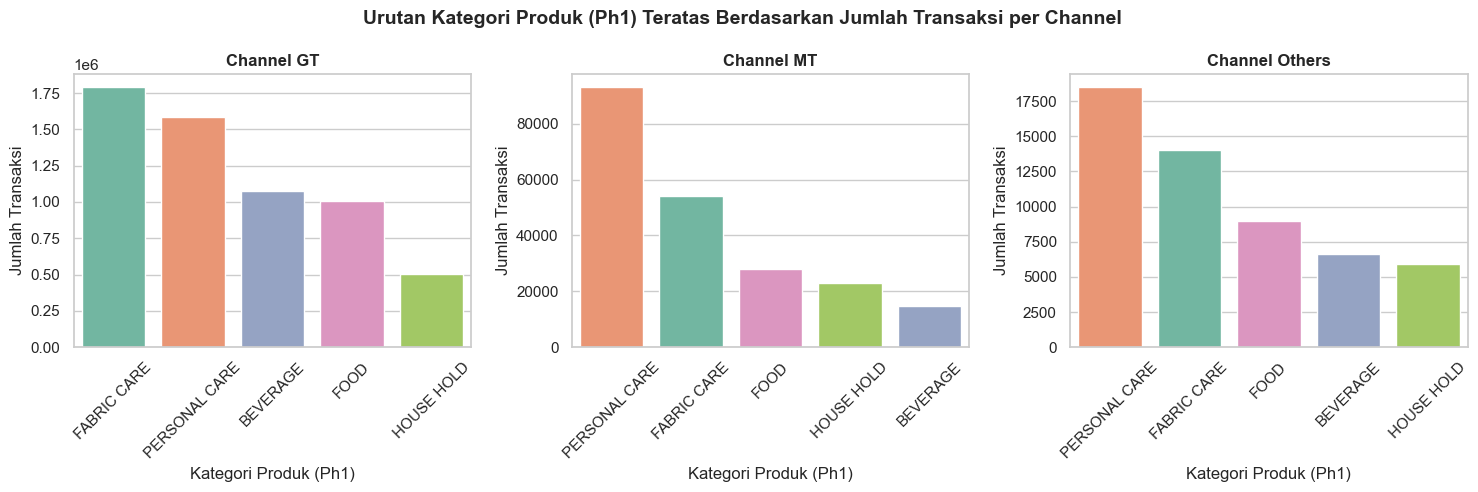

In [ ]:
sns.set(style="whitegrid")

channels = top_ph1_per_channel['channel'].unique()
n_channels = len(channels)

fig, axes = plt.subplots(
    1, n_channels,
    figsize=(5 * n_channels, 5),
    sharey=False
)

if n_channels == 1:
    axes = [axes]

for ax, ch in zip(axes, channels):
    data_ch = (
        top_ph1_per_channel[top_ph1_per_channel['channel'] == ch]
        .sort_values('jumlah_transaksi', ascending=False)
    )

    sns.barplot(
        data=data_ch,
        x='desc1',
        y='jumlah_transaksi',
        palette=[ph1_color_map[d] for d in data_ch['desc1']],
        ax=ax
    )

    ax.set_title(f"Channel {ch}", fontsize=12, weight='bold')
    ax.set_xlabel("Kategori Produk (Ph1)")
    ax.set_ylabel("Jumlah Transaksi")
    ax.tick_params(axis='x', rotation=45)

fig.suptitle(
    "Urutan Kategori Produk (Ph1) Teratas Berdasarkan Jumlah Transaksi per Channel",
    fontsize=14,
    weight='bold'
)

plt.tight_layout()
plt.show()


# Analisis Pola dan Heterogenitas Perilaku Pelanggan

In [ ]:
df_gt = order_cust[order_cust['channel'] == 'GT'].copy()
df_gt['date_id'] = pd.to_datetime(df_gt['date_id'])

In [72]:
df_gt.head()

,date_id,customer_id,mid,value_bill,qty_box,customer_group,channel,day_of_week,year_month,prev_date,purchase_interval,day_of_month,segment_month
1698848,2024-10-04,101,141219426,493811.0,15.000,WS Beverage,GT,4,2024-10,NaT,NaN,4,Awal Bulan
145711,2024-10-18,101,141217128,291795.0,10.000,WS Beverage,GT,4,2024-10,2024-10-04,14.0,18,Tengah Bulan
155702,2024-10-25,101,131219171,4069.0,0.083,WS Beverage,GT,4,2024-10,2024-10-18,7.0,25,Akhir Bulan
870734,2024-10-25,101,131217249,2612.0,0.025,WS Beverage,GT,4,2024-10,2024-10-25,0.0,25,Akhir Bulan
914351,2024-10-25,101,131216824,2612.0,0.025,WS Beverage,GT,4,2024-10,2024-10-25,0.0,25,Akhir Bulan


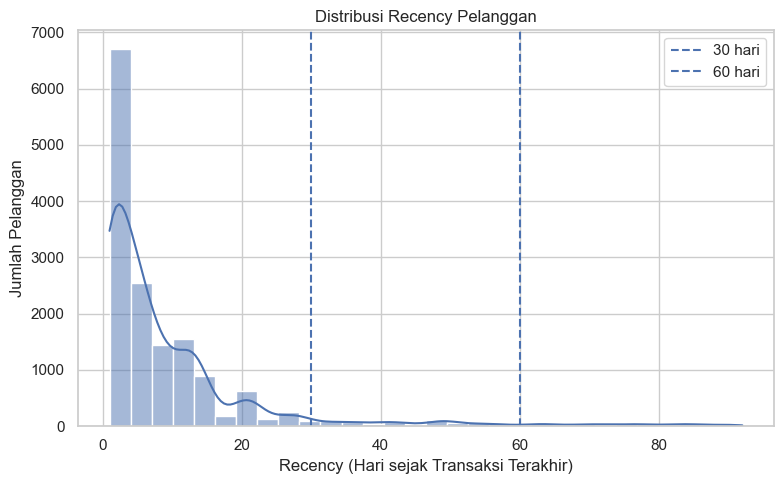

In [ ]:
snapshot_date = df_gt['date_id'].max() + pd.Timedelta(days=1)

recency_df = (
    df_gt
    .groupby('customer_id')['date_id']
    .max()
    .reset_index()
)

recency_df['recency'] = (snapshot_date - recency_df['date_id']).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(
    recency_df['recency'],
    bins=30,
    kde=True
)

plt.title("Distribusi Recency Pelanggan")
plt.xlabel("Recency (Hari sejak Transaksi Terakhir)")
plt.ylabel("Jumlah Pelanggan")

plt.axvline(30, linestyle='--', label='30 hari')
plt.axvline(60, linestyle='--', label='60 hari')
plt.legend()

plt.tight_layout()
plt.show()


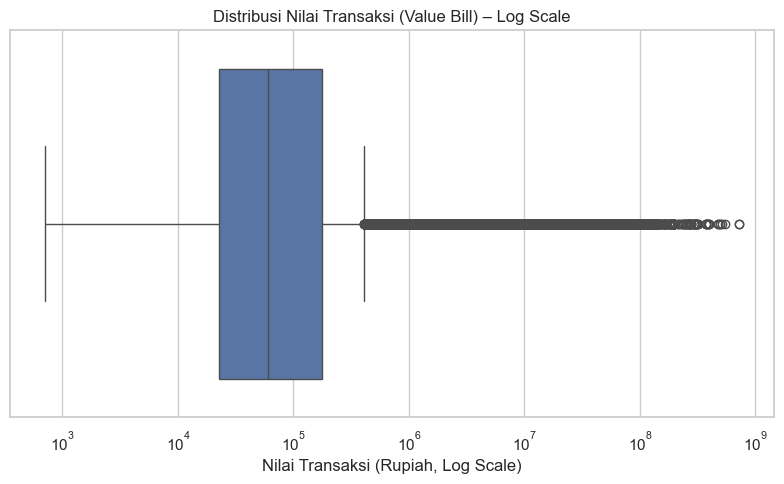

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x=df_gt['value_bill'],
    showfliers=True
)

plt.xscale('log')

plt.title("Distribusi Nilai Transaksi (Value Bill) – Log Scale")
plt.xlabel("Nilai Transaksi (Rupiah, Log Scale)")
plt.tight_layout()
plt.show()

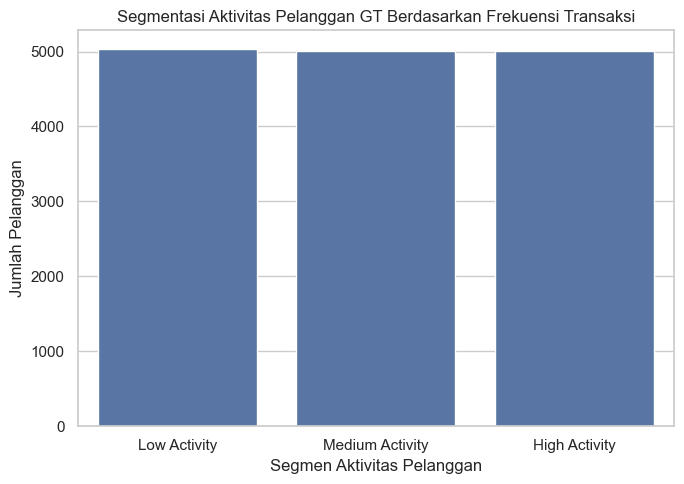

In [69]:
cust_freq = (
    df_gt
    .groupby('customer_id')
    .size()
    .reset_index(name='total_transactions')
)

cust_freq['activity_segment'] = pd.qcut(
    cust_freq['total_transactions'],
    q=3,
    labels=['Low Activity', 'Medium Activity', 'High Activity']
)

plt.figure(figsize=(7, 5))
sns.countplot(
    data=cust_freq,
    x='activity_segment',
    order=['Low Activity', 'Medium Activity', 'High Activity']
)

plt.title("Segmentasi Aktivitas Pelanggan GT Berdasarkan Frekuensi Transaksi")
plt.xlabel("Segmen Aktivitas Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()


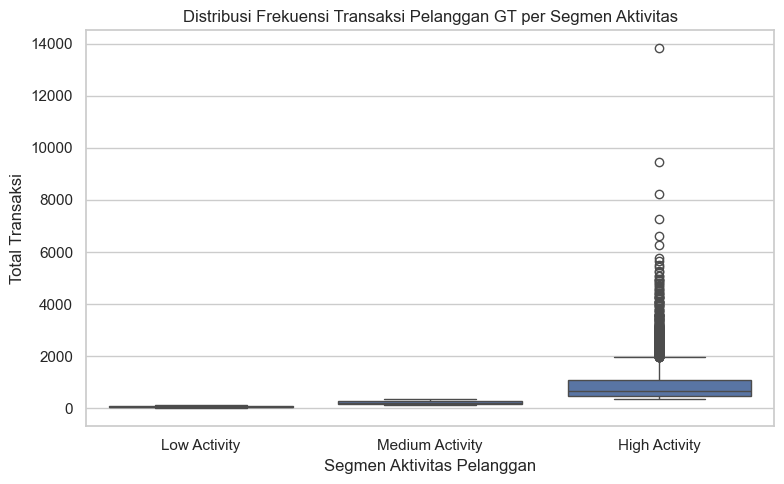

In [81]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=cust_freq,
    x='activity_segment',
    y='total_transactions',
    order=['Low Activity', 'Medium Activity', 'High Activity']
)

plt.title("Distribusi Frekuensi Transaksi Pelanggan GT per Segmen Aktivitas")
plt.xlabel("Segmen Aktivitas Pelanggan")
plt.ylabel("Total Transaksi")
plt.tight_layout()
plt.show()

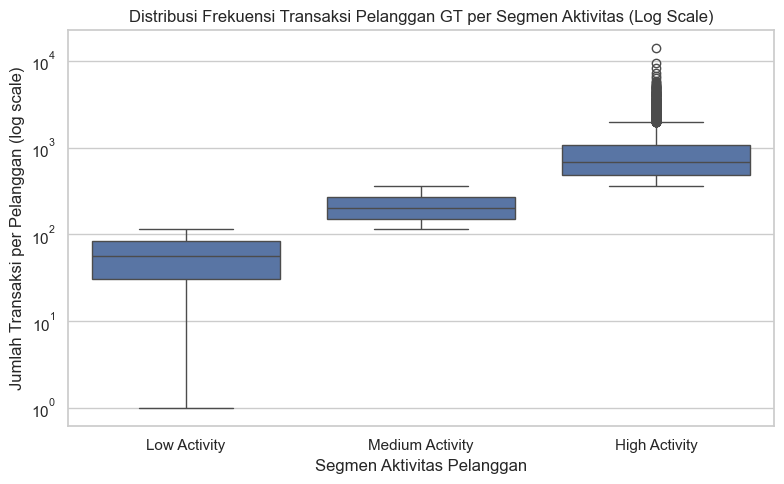

In [ ]:
cust_freq['activity_segment'] = pd.qcut(
    cust_freq['transaction_count'], # total_transactions
    q=3,
    labels=['Low Activity', 'Medium Activity', 'High Activity']
)


plt.figure(figsize=(8, 5))

sns.boxplot(
    data=cust_freq,
    x='activity_segment',
    y='transaction_count',
    order=['Low Activity', 'Medium Activity', 'High Activity'],
    showfliers=True
)

plt.yscale('log') 
plt.title("Distribusi Frekuensi Transaksi Pelanggan GT per Segmen Aktivitas (Log Scale)")
plt.xlabel("Segmen Aktivitas Pelanggan")
plt.ylabel("Jumlah Transaksi per Pelanggan (log scale)")
plt.tight_layout()
plt.show()



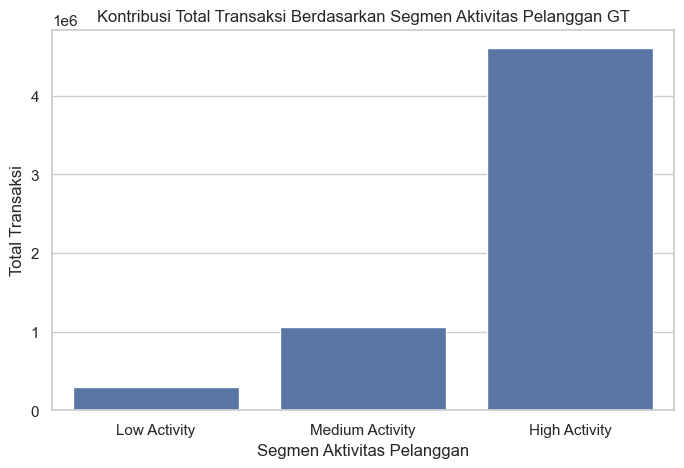

In [82]:
segment_contribution = (
    cust_freq
    .groupby('activity_segment')['total_transactions']
    .sum()
    .reindex(['Low Activity', 'Medium Activity', 'High Activity'])
)

plt.figure(figsize=(7, 5))

sns.barplot(
    x=segment_contribution.index,
    y=segment_contribution.values
)

plt.title("Kontribusi Total Transaksi Berdasarkan Segmen Aktivitas Pelanggan GT")
plt.xlabel("Segmen Aktivitas Pelanggan")
plt.ylabel("Total Transaksi")
plt.tight_layout()
plt.show()


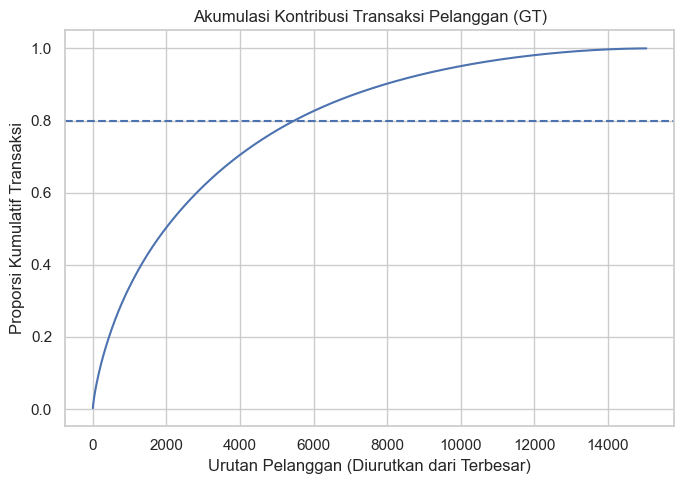

In [114]:
top_k = cust_freq.sort_values(
    'total_transactions', ascending=False
)

top_k['cum_share'] = (
    top_k['total_transactions'].cumsum() /
    top_k['total_transactions'].sum()
)

plt.figure(figsize=(7, 5))
plt.plot(top_k['cum_share'].values)

plt.axhline(0.8, linestyle='--')
plt.title("Akumulasi Kontribusi Transaksi Pelanggan (GT)")
plt.xlabel("Urutan Pelanggan (Diurutkan dari Terbesar)")
plt.ylabel("Proporsi Kumulatif Transaksi")
plt.tight_layout()
plt.show()


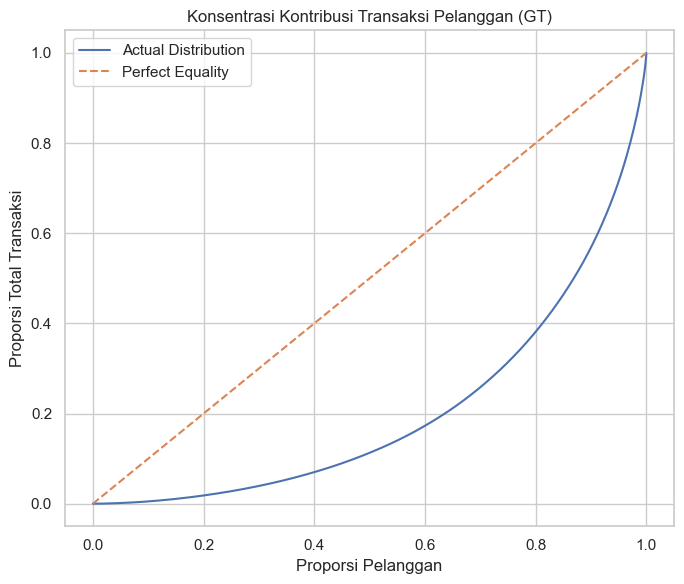

In [115]:
cust_total_tx = (
    cust_freq
    .sort_values('total_transactions')
    ['total_transactions']
    .values
)

cum_tx = np.cumsum(cust_total_tx)
cum_tx_share = cum_tx / cum_tx[-1]

cust_share = np.arange(1, len(cum_tx) + 1) / len(cum_tx)

plt.figure(figsize=(7, 6))
plt.plot(cust_share, cum_tx_share, label='Actual Distribution')
plt.plot([0, 1], [0, 1], '--', label='Perfect Equality')

plt.title("Konsentrasi Kontribusi Transaksi Pelanggan (GT)")
plt.xlabel("Proporsi Pelanggan")
plt.ylabel("Proporsi Total Transaksi")
plt.legend()
plt.tight_layout()
plt.show()


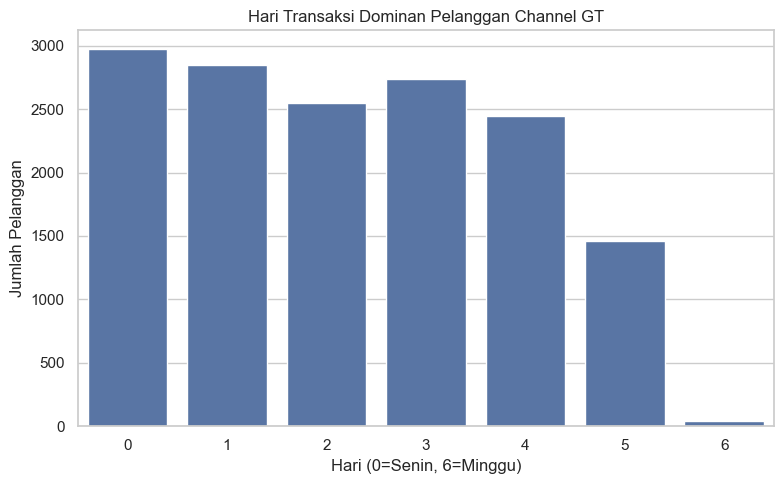

In [70]:
df_gt['day_of_week'] = df_gt['date_id'].dt.dayofweek

cust_dow_mode = (
    df_gt
    .groupby('customer_id')['day_of_week']
    .agg(lambda x: x.mode().iloc[0])
    .reset_index(name='day_of_week_mode')
)

plt.figure(figsize=(8, 5))
sns.countplot(
    data=cust_dow_mode,
    x='day_of_week_mode'
)

plt.title("Hari Transaksi Dominan Pelanggan Channel GT")
plt.xlabel("Hari (0=Senin, 6=Minggu)")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()


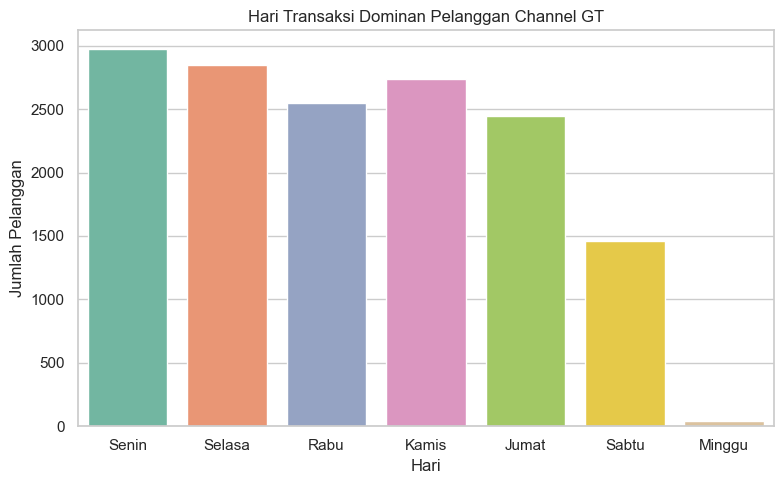

In [ ]:
day_map = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}

cust_dow_mode['day_name'] = cust_dow_mode['day_of_week_mode'].map(day_map)

plt.figure(figsize=(8, 5))

sns.countplot(
    data=cust_dow_mode,
    x='day_name',
    order=['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'],
    palette='Set2'
)

plt.title("Hari Transaksi Dominan Pelanggan Channel GT")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

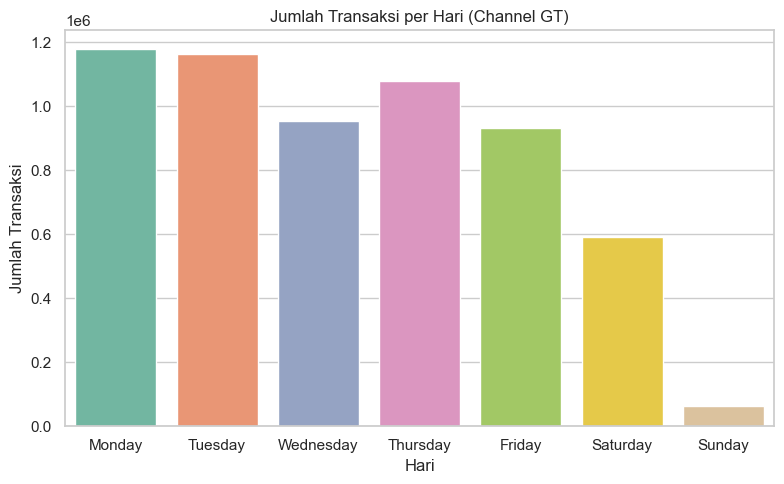

In [117]:
df_gt['day_name'] = df_gt['date_id'].dt.day_name()

daily_tx = (
    df_gt
    .groupby('day_name')
    .size()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)

plt.figure(figsize=(8,5))
sns.barplot(x=daily_tx.index, y=daily_tx.values, palette='Set2')
plt.title("Jumlah Transaksi per Hari (Channel GT)")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()
plt.show()


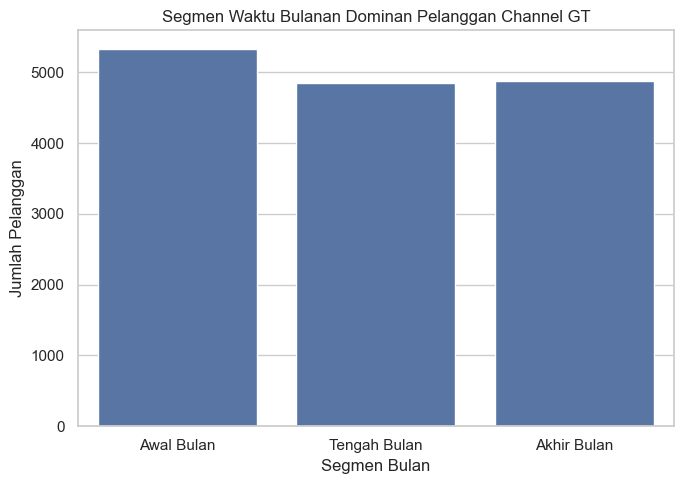

In [90]:
df_gt['day_of_month'] = df_gt['date_id'].dt.day

def segment_month(day):
    if day <= 10:
        return 'Awal Bulan'
    elif day <= 20:
        return 'Tengah Bulan'
    else:
        return 'Akhir Bulan'

df_gt['segment_month'] = df_gt['day_of_month'].apply(segment_month)

cust_segment_mode = (
    df_gt
    .groupby('customer_id')['segment_month']
    .agg(lambda x: x.mode().iloc[0])
    .reset_index(name='segment_of_month_mode')
)

plt.figure(figsize=(7, 5))
sns.countplot(
    data=cust_segment_mode,
    x='segment_of_month_mode',
    order=['Awal Bulan', 'Tengah Bulan', 'Akhir Bulan']
)

plt.title("Segmen Waktu Bulanan Dominan Pelanggan Channel GT")
plt.xlabel("Segmen Bulan")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()


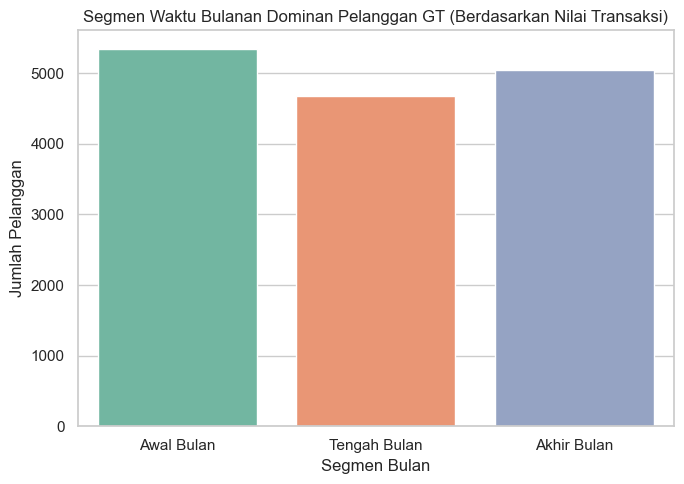

In [119]:
cust_segment_value = (
    df_gt
    .groupby(['customer_id', 'segment_month'])['value_bill']
    .sum()
    .reset_index()
)

cust_segment_value_mode = (
    cust_segment_value
    .sort_values(['customer_id', 'value_bill'], ascending=[True, False])
    .groupby('customer_id')
    .first()
    .reset_index()
)

plt.figure(figsize=(7, 5))
sns.countplot(
    data=cust_segment_value_mode,
    x='segment_month',
    order=['Awal Bulan', 'Tengah Bulan', 'Akhir Bulan'],
    palette='Set2'
)

plt.title("Segmen Waktu Bulanan Dominan Pelanggan GT (Berdasarkan Nilai Transaksi)")
plt.xlabel("Segmen Bulan")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()



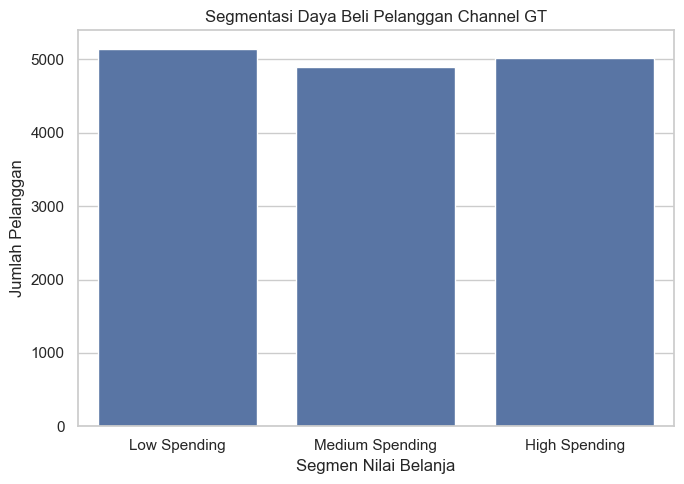

In [73]:
cust_monetary = (
    df_gt
    .groupby('customer_id')['value_bill']
    .median()
    .reset_index(name='median_valuebill')
)

cust_monetary['monetary_segment'] = pd.qcut(
    cust_monetary['median_valuebill'],
    q=3,
    labels=['Low Spending', 'Medium Spending', 'High Spending']
)

plt.figure(figsize=(7, 5))
sns.countplot(
    data=cust_monetary,
    x='monetary_segment',
    order=['Low Spending', 'Medium Spending', 'High Spending']
)

plt.title("Segmentasi Daya Beli Pelanggan Channel GT")
plt.xlabel("Segmen Nilai Belanja")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()


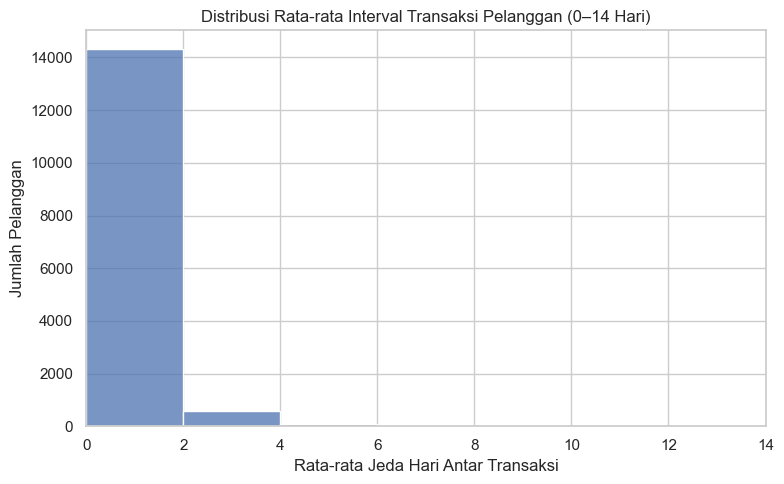

In [ ]:
df_gt = order_cust[order_cust['channel'] == 'GT'].copy()
df_gt['date_id'] = pd.to_datetime(df_gt['date_id'])

df_gt = df_gt.sort_values(['customer_id', 'date_id'])
df_gt['interval_days'] = (
    df_gt.groupby('customer_id')['date_id']
    .diff()
    .dt.days
)

cust_interval = (
    df_gt
    .groupby('customer_id')['interval_days']
    .mean()
    .dropna()
)

plt.figure(figsize=(8, 5))
sns.histplot(cust_interval, bins=30)
plt.xlim(0, 14)

plt.title("Distribusi Rata-rata Interval Transaksi Pelanggan (0–14 Hari)")
plt.xlabel("Rata-rata Jeda Hari Antar Transaksi")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

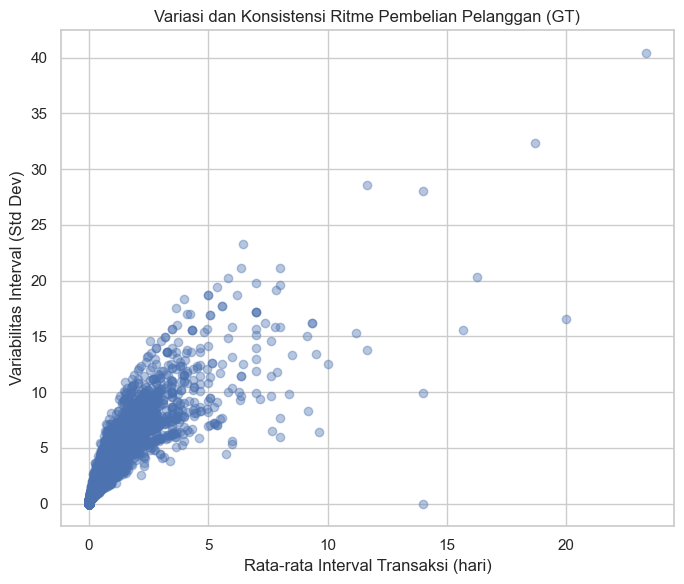

In [ ]:
interval_stats = (
    df_gt
    .groupby('customer_id')['interval_days']
    .agg(['mean', 'std'])
    .dropna()
)

plt.figure(figsize=(7, 6))
plt.scatter(
    interval_stats['mean'],
    interval_stats['std'],
    alpha=0.4
)

plt.title("Variasi dan Konsistensi Ritme Pembelian Pelanggan (GT)")
plt.xlabel("Rata-rata Interval Transaksi (hari)")
plt.ylabel("Variabilitas Interval (Std Dev)")
plt.tight_layout()
plt.show()

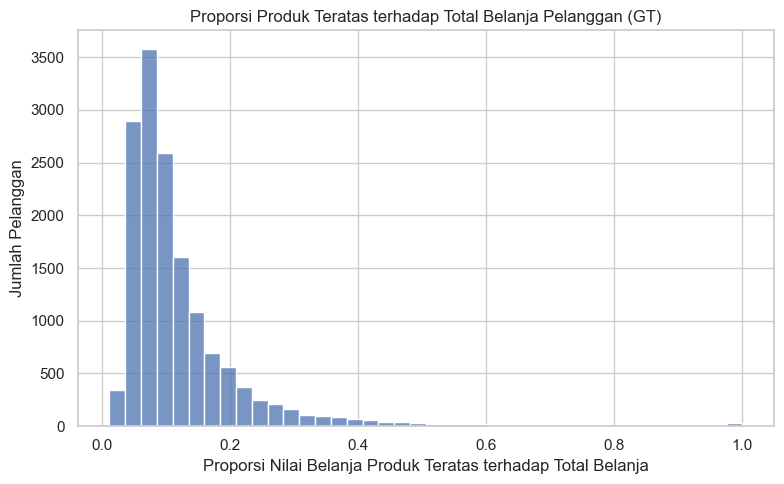

In [ ]:
cust_product_share = (
    df_gt
    .groupby(['customer_id', 'mid'])['value_bill']
    .sum()
    .reset_index()
)

cust_total = cust_product_share.groupby('customer_id')['value_bill'].sum()
cust_product_share['share'] = (
    cust_product_share['value_bill'] /
    cust_product_share['customer_id'].map(cust_total)
)

top1_share = (
    cust_product_share
    .sort_values(['customer_id', 'share'], ascending=False)
    .groupby('customer_id')
    .first()['share']
)

plt.figure(figsize=(8, 5))
sns.histplot(top1_share, bins=40)

plt.title("Proporsi Produk Teratas terhadap Total Belanja Pelanggan (GT)")
plt.xlabel("Proporsi Nilai Belanja Produk Teratas terhadap Total Belanja")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

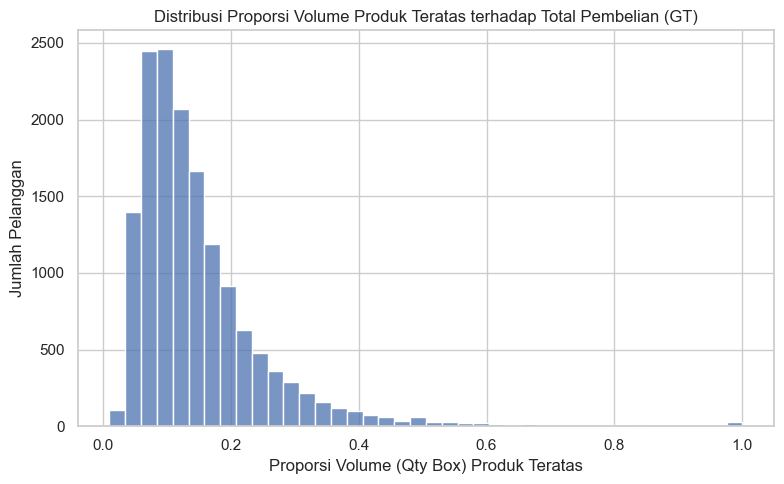

In [ ]:
cust_product_qty = (
    df_gt
    .groupby(['customer_id', 'mid'])['qty_box']
    .sum()
    .reset_index()
)

cust_total_qty = cust_product_qty.groupby('customer_id')['qty_box'].sum()

cust_product_qty['share'] = (
    cust_product_qty['qty_box'] /
    cust_product_qty['customer_id'].map(cust_total_qty)
)

top1_qty_share = (
    cust_product_qty
    .sort_values(['customer_id', 'share'], ascending=False)
    .groupby('customer_id')
    .first()['share']
)

plt.figure(figsize=(8, 5))
sns.histplot(top1_qty_share, bins=40)

plt.title("Distribusi Proporsi Volume Produk Teratas terhadap Total Pembelian (GT)")
plt.xlabel("Proporsi Volume (Qty Box) Produk Teratas")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

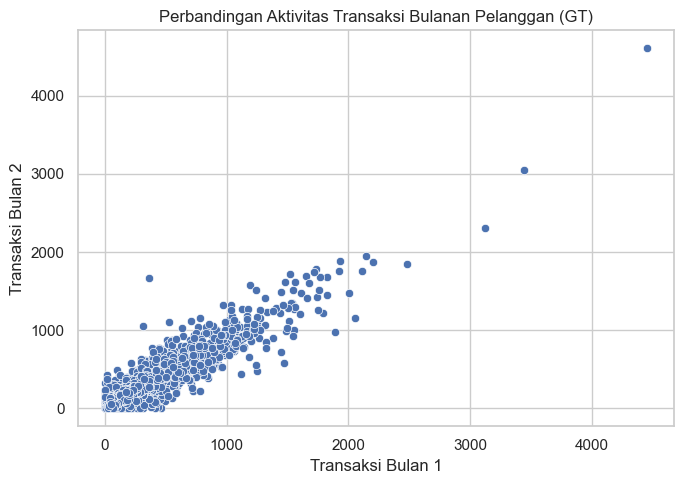

In [80]:
df_gt['month'] = df_gt['date_id'].dt.month

cust_monthly = (
    df_gt
    .groupby(['customer_id', 'month'])
    .size()
    .reset_index(name='trx_count')
)

pivot = cust_monthly.pivot(
    index='customer_id',
    columns='month',
    values='trx_count'
).fillna(0)

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=pivot.iloc[:, 0],
    y=pivot.iloc[:, 1]
)

plt.title("Perbandingan Aktivitas Transaksi Bulanan Pelanggan (GT)")
plt.xlabel("Transaksi Bulan 1")
plt.ylabel("Transaksi Bulan 2")
plt.tight_layout()
plt.show()


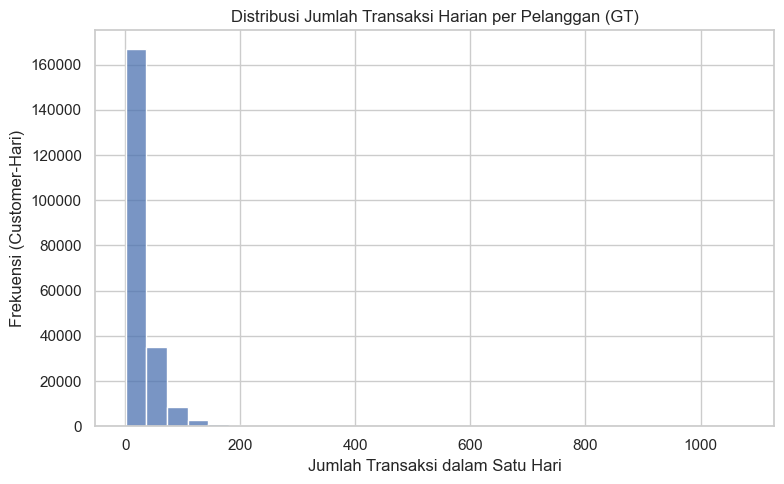

In [ ]:
daily_cust_trx = (
    df_gt
    .groupby(['customer_id', 'date_id'])
    .size()
    .reset_index(name='daily_trx_count')
)

plt.figure(figsize=(8, 5))
sns.histplot(
    daily_cust_trx['daily_trx_count'],
    bins=30
)

plt.title("Distribusi Jumlah Transaksi Harian per Pelanggan (GT)")
plt.xlabel("Jumlah Transaksi dalam Satu Hari")
plt.ylabel("Frekuensi (Customer-Hari)")
plt.tight_layout()
plt.show()


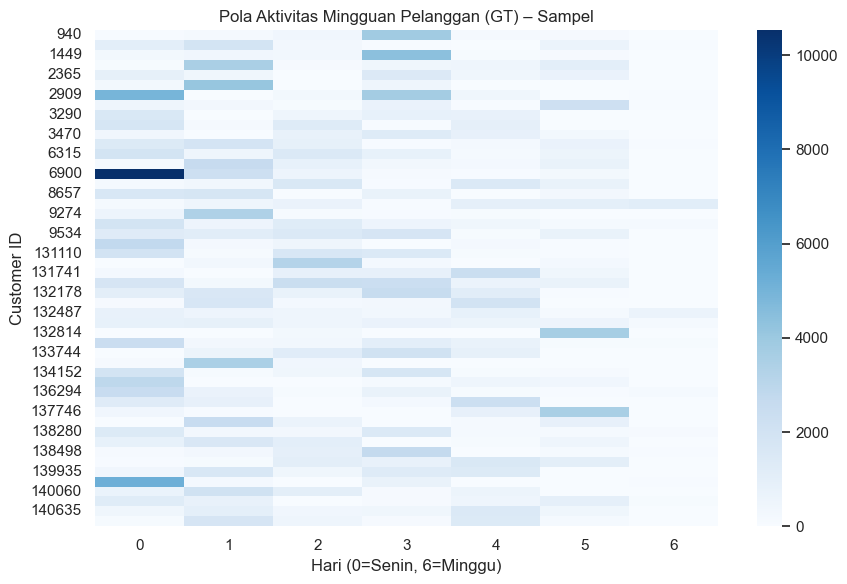

In [ ]:
sample_customers = (
    df_gt['customer_id']
    .value_counts()
    .head(50)
    .index
)

heatmap_data = (
    df_gt[df_gt['customer_id'].isin(sample_customers)]
    .groupby(['customer_id', 'day_of_week'])
    .size()
    .reset_index(name='trx_count')
    .pivot(
        index='customer_id',
        columns='day_of_week',
        values='trx_count'
    )
    .fillna(0)
)

plt.figure(figsize=(9, 6))
sns.heatmap(
    heatmap_data,
    cmap="Blues"
)

plt.title("Pola Aktivitas Mingguan Pelanggan (GT) – Sampel")
plt.xlabel("Hari (0=Senin, 6=Minggu)")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

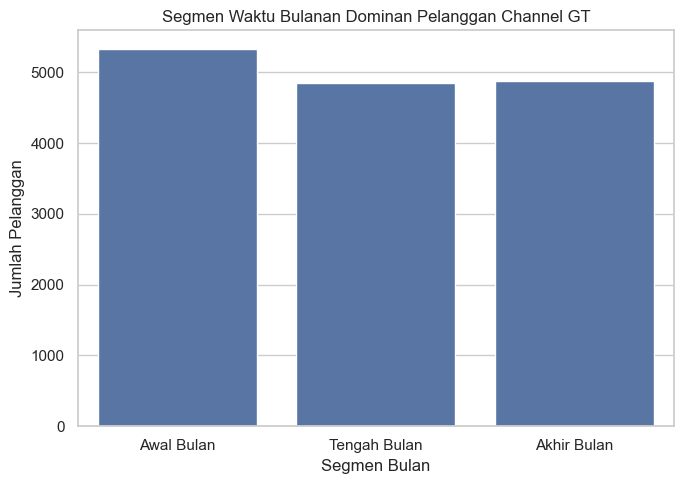

In [ ]:
df_gt['day_of_month'] = df_gt['date_id'].dt.day

def segment_month(day):
    if day <= 10:
        return 'Awal Bulan'
    elif day <= 20:
        return 'Tengah Bulan'
    else:
        return 'Akhir Bulan'

df_gt['segment_month'] = df_gt['day_of_month'].apply(segment_month)

cust_segment_mode = (
    df_gt
    .groupby('customer_id')['segment_month']
    .agg(lambda x: x.mode().iloc[0])
    .reset_index(name='segment_of_month_mode')
)

plt.figure(figsize=(7, 5))
sns.countplot(
    data=cust_segment_mode,
    x='segment_of_month_mode',
    order=['Awal Bulan', 'Tengah Bulan', 'Akhir Bulan']
)

plt.title("Segmen Waktu Bulanan Dominan Pelanggan Channel GT")
plt.xlabel("Segmen Bulan")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

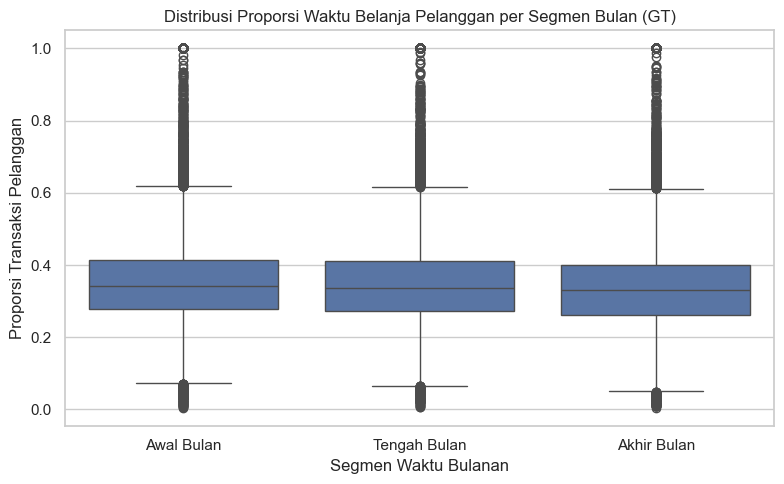

In [ ]:
cust_month_dist = (
    df_gt
    .groupby(['customer_id', 'segment_month'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .rename('share')
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=cust_month_dist,
    x='segment_month',
    y='share',
    order=['Awal Bulan', 'Tengah Bulan', 'Akhir Bulan']
)

plt.title("Distribusi Proporsi Waktu Belanja Pelanggan per Segmen Bulan (GT)")
plt.xlabel("Segmen Waktu Bulanan")
plt.ylabel("Proporsi Transaksi Pelanggan")
plt.tight_layout()
plt.show()


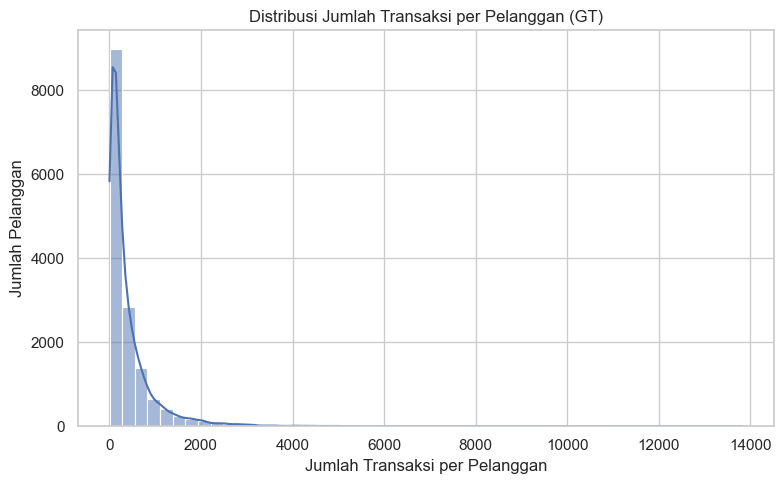

In [ ]:
cust_freq = (
    df_gt
    .groupby('customer_id')
    .size()
    .reset_index(name='total_transactions')
)

plt.figure(figsize=(8, 5))
sns.histplot(
    cust_freq['total_transactions'],
    bins=50,
    kde=True
)

plt.title("Distribusi Jumlah Transaksi per Pelanggan (GT)")
plt.xlabel("Jumlah Transaksi per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

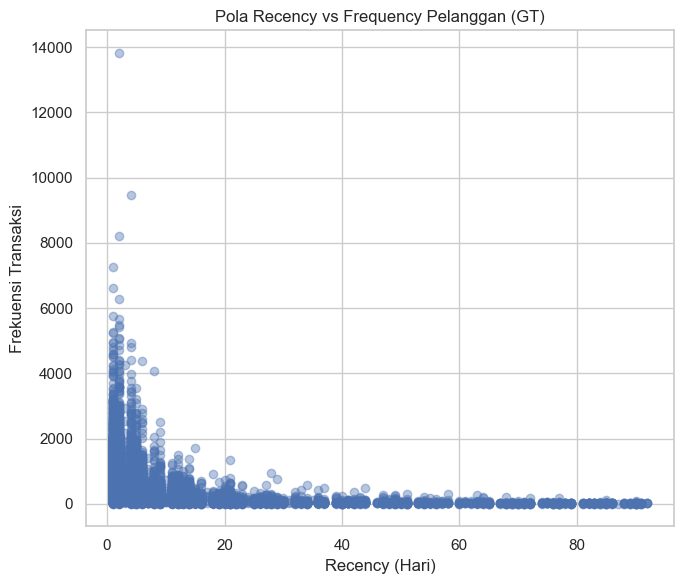

In [ ]:
snapshot_date = df_gt['date_id'].max() + pd.Timedelta(days=1)

cust_recency = (
    df_gt
    .groupby('customer_id')['date_id']
    .max()
    .apply(lambda x: (snapshot_date - x).days)
)

cust_freq = df_gt.groupby('customer_id').size()

rf_df = pd.DataFrame({
    'recency': cust_recency,
    'frequency': cust_freq
})

plt.figure(figsize=(7, 6))
plt.scatter(
    rf_df['recency'],
    rf_df['frequency'],
    alpha=0.4
)

plt.title("Pola Recency vs Frequency Pelanggan (GT)")
plt.xlabel("Recency (Hari)")
plt.ylabel("Frekuensi Transaksi")
plt.tight_layout()
plt.show()

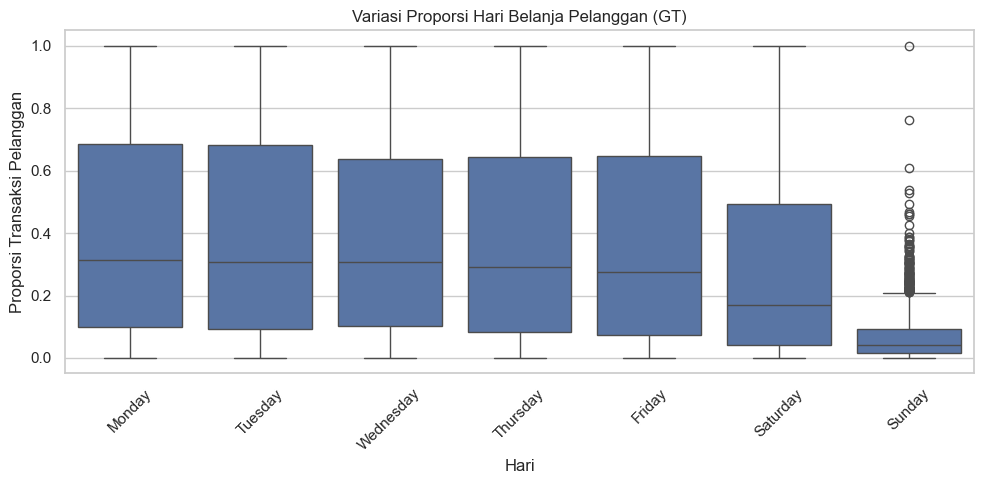

In [101]:
cust_dow_dist = (
    df_gt
    .assign(day_of_week=df_gt['date_id'].dt.day_name())
    .groupby(['customer_id', 'day_of_week'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .rename('share')
    .reset_index()
)


plt.figure(figsize=(10, 5))
sns.boxplot(
    data=cust_dow_dist,
    x='day_of_week',
    y='share',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.title("Variasi Proporsi Hari Belanja Pelanggan (GT)")
plt.xlabel("Hari")
plt.ylabel("Proporsi Transaksi Pelanggan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


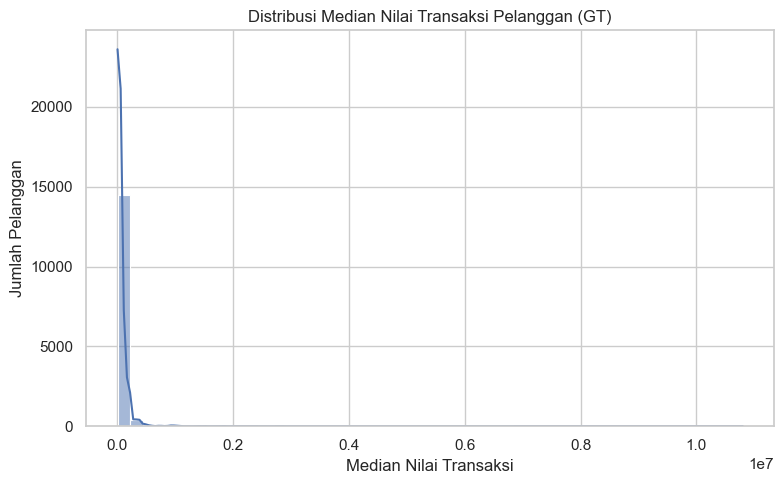

In [ ]:
cust_value = (
    df_gt
    .groupby('customer_id')['value_bill']
    .median()
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.histplot(
    cust_value['value_bill'],
    bins=50,
    kde=True
)

plt.title("Distribusi Median Nilai Transaksi Pelanggan (GT)")
plt.xlabel("Median Nilai Transaksi")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

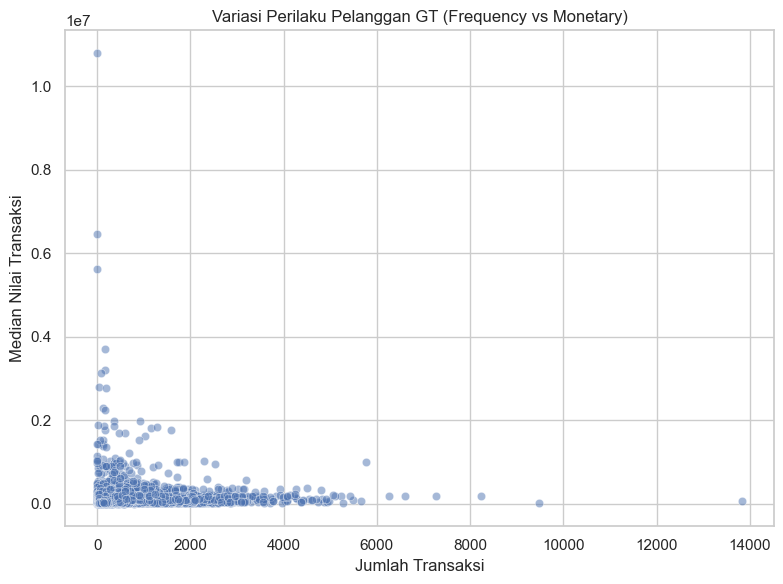

In [ ]:
cust_fm = (
    df_gt
    .groupby('customer_id')
    .agg(
        frequency=('date_id', 'count'),
        monetary=('value_bill', 'median')
    )
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cust_fm,
    x='frequency',
    y='monetary',
    alpha=0.5
)

plt.title("Variasi Perilaku Pelanggan GT (Frequency vs Monetary)")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Median Nilai Transaksi")
plt.tight_layout()
plt.show()

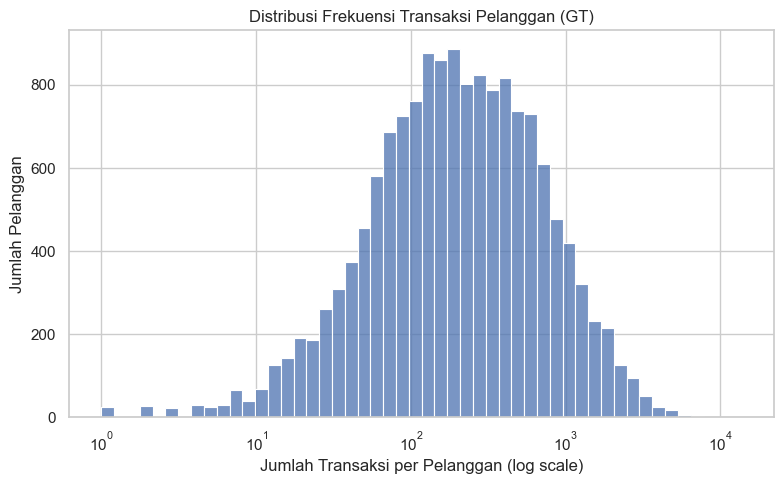

In [ ]:
cust_txn = (
    df_gt
    .groupby('customer_id')
    .size()
    .reset_index(name='total_transactions')
)

plt.figure(figsize=(8, 5))
sns.histplot(
    cust_txn['total_transactions'],
    bins=50,
    log_scale=True
)

plt.title("Distribusi Frekuensi Transaksi Pelanggan (GT)")
plt.xlabel("Jumlah Transaksi per Pelanggan (log scale)")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

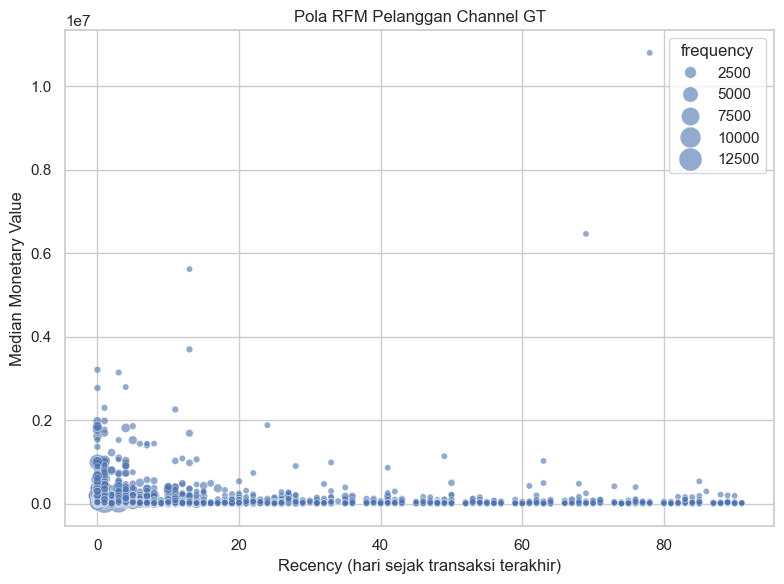

In [ ]:
snapshot_date = df_gt['date_id'].max()

rfm = (
    df_gt
    .groupby('customer_id')
    .agg(
        recency=('date_id', lambda x: (snapshot_date - x.max()).days),
        frequency=('date_id', 'count'),
        monetary=('value_bill', 'median')
    )
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm,
    x='recency',
    y='monetary',
    size='frequency',
    sizes=(20, 300),
    alpha=0.6
)

plt.title("Pola RFM Pelanggan Channel GT")
plt.xlabel("Recency (hari sejak transaksi terakhir)")
plt.ylabel("Median Monetary Value")
plt.tight_layout()
plt.show()

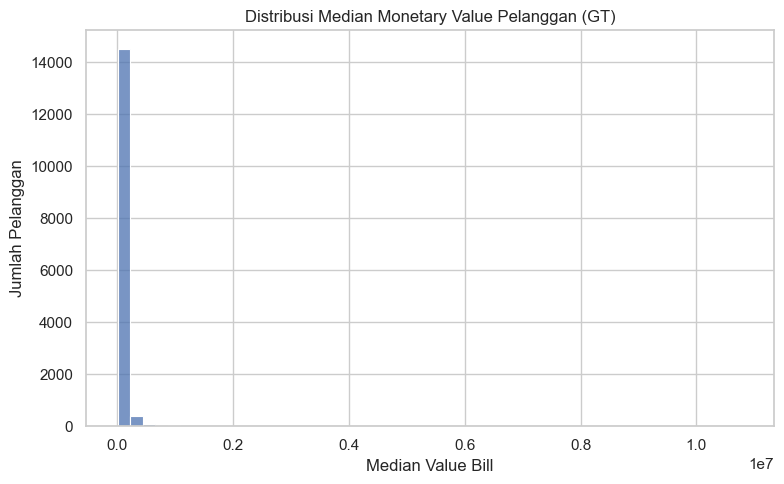

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    rfm['monetary'],
    bins=50
)

plt.title("Distribusi Median Monetary Value Pelanggan (GT)")
plt.xlabel("Median Value Bill")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

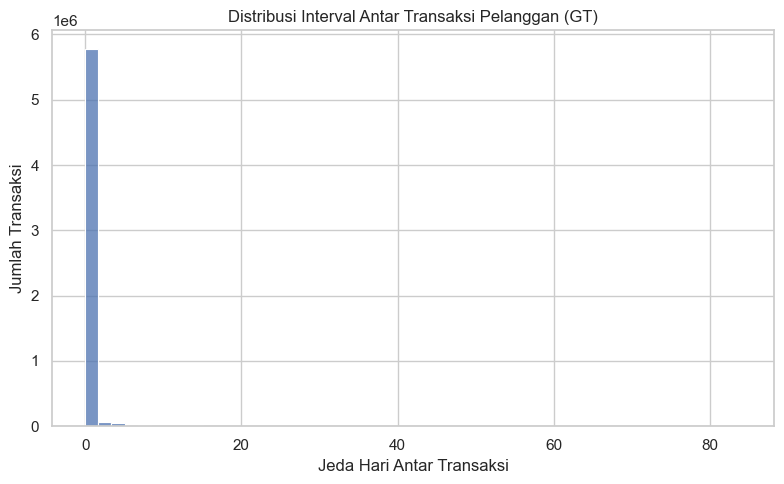

In [ ]:
cust_interval = (
    df_gt
    .sort_values(['customer_id', 'date_id'])
    .groupby('customer_id')['date_id']
    .diff()
    .dt.days
)

plt.figure(figsize=(8, 5))
sns.histplot(
    cust_interval.dropna(),
    bins=50
)

plt.title("Distribusi Interval Antar Transaksi Pelanggan (GT)")
plt.xlabel("Jeda Hari Antar Transaksi")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()
plt.show()

# Analisis Pola Penjualan dan Heterogenitas Produk

In [ ]:
df_gt = order_cust[order_cust['channel'] == 'GT'].copy()

product_feat = (
    df_gt
    .groupby('mid')
    .agg(
        n_cust=('customer_id', 'nunique'),
        total_sales_count=('mid', 'count'),
        total_qty_sold=('qty_box', 'sum'),
        total_revenue=('value_bill', 'sum')
    )
    .reset_index()
)

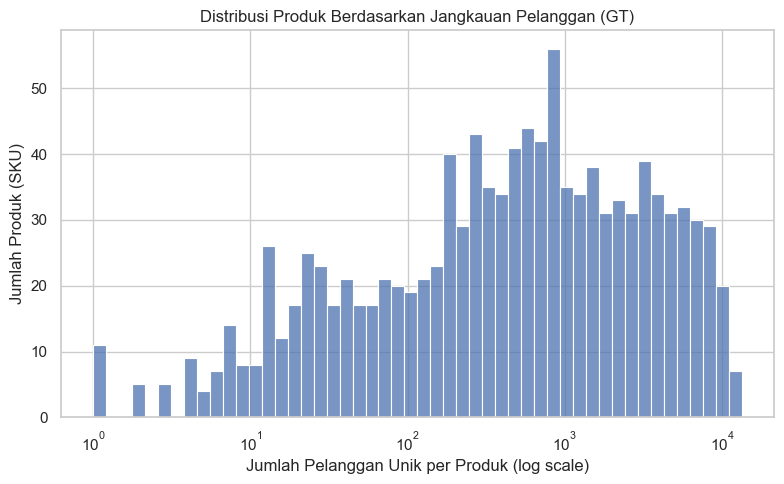

In [145]:
plt.figure(figsize=(8, 5))
sns.histplot(
    product_feat['n_cust'],
    bins=50,
    log_scale=True
)

plt.title("Distribusi Produk Berdasarkan Jangkauan Pelanggan (GT)")
plt.xlabel("Jumlah Pelanggan Unik per Produk (log scale)")
plt.ylabel("Jumlah Produk (SKU)")

plt.tight_layout()
plt.show()


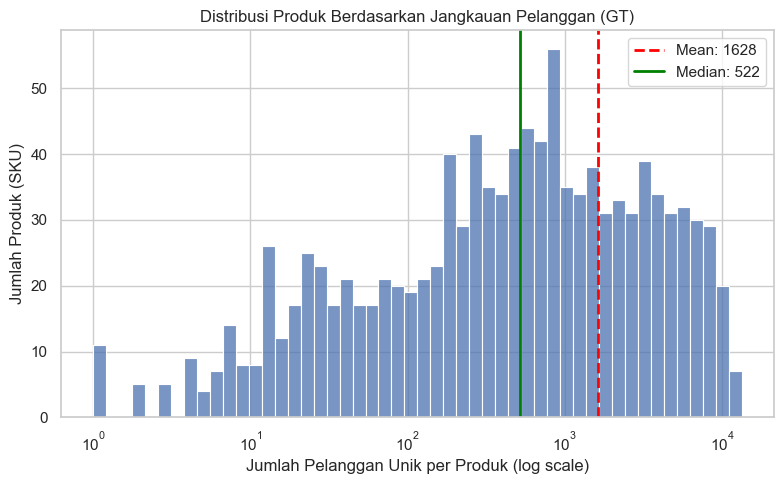

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    product_feat['n_cust'],
    bins=50,
    log_scale=True
)

mean_val = product_feat['n_cust'].mean()
median_val = product_feat['n_cust'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.0f}')

plt.title("Distribusi Produk Berdasarkan Jangkauan Pelanggan (GT)")
plt.xlabel("Jumlah Pelanggan Unik per Produk (log scale)")
plt.ylabel("Jumlah Produk (SKU)")
plt.legend()

plt.tight_layout()
plt.show()

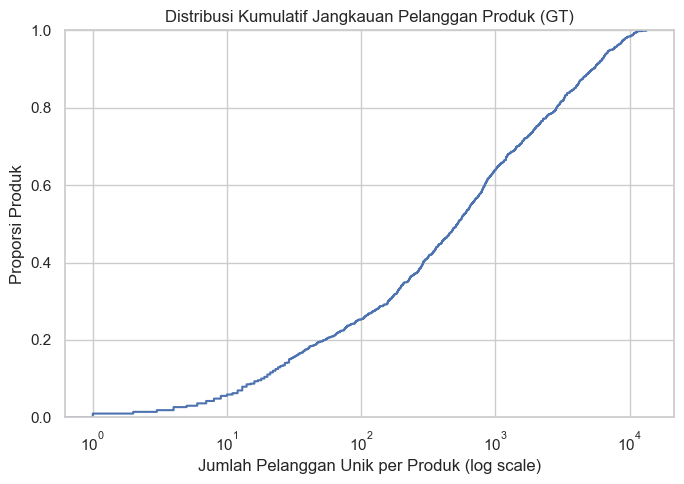

In [137]:
plt.figure(figsize=(7, 5))

sns.ecdfplot(
    data=product_feat,
    x='n_cust'
)

plt.xscale('log')
plt.title("Distribusi Kumulatif Jangkauan Pelanggan Produk (GT)")
plt.xlabel("Jumlah Pelanggan Unik per Produk (log scale)")
plt.ylabel("Proporsi Produk")
plt.tight_layout()
plt.show()


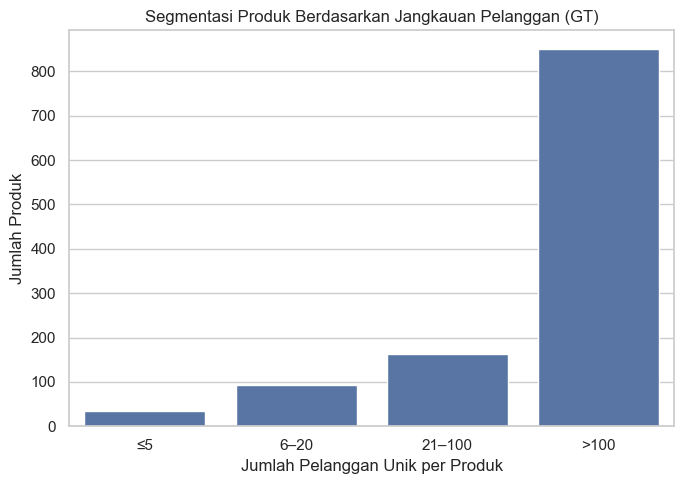

In [138]:
product_feat['cust_range'] = pd.cut(
    product_feat['n_cust'],
    bins=[0, 5, 20, 100, product_feat['n_cust'].max()],
    labels=['≤5', '6–20', '21–100', '>100']
)

plt.figure(figsize=(7, 5))
sns.countplot(
    data=product_feat,
    x='cust_range',
    order=['≤5', '6–20', '21–100', '>100']
)

plt.title("Segmentasi Produk Berdasarkan Jangkauan Pelanggan (GT)")
plt.xlabel("Jumlah Pelanggan Unik per Produk")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()


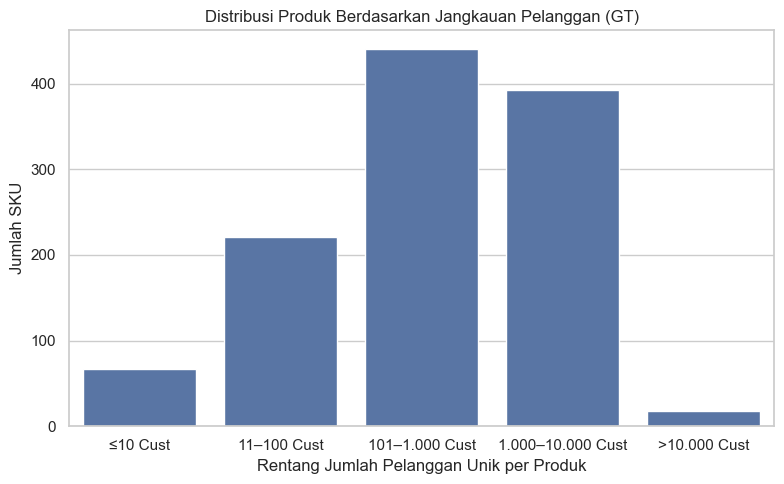

In [ ]:
product_feat['cust_segment'] = pd.cut(
    product_feat['n_cust'],
    bins=[0, 10, 100, 1000, 10000, product_feat['n_cust'].max()],
    labels=[
        '≤10 Cust',
        '11–100 Cust',
        '101–1.000 Cust',
        '1.000–10.000 Cust',
        '>10.000 Cust'
    ]
)

plt.figure(figsize=(8, 5))

sns.countplot(
    data=product_feat,
    x='cust_segment',
    order=[
        '≤10 Cust',
        '11–100 Cust',
        '101–1.000 Cust',
        '1.000–10.000 Cust',
        '>10.000 Cust'
    ]
)

plt.title("Distribusi Produk Berdasarkan Jangkauan Pelanggan (GT)")
plt.xlabel("Rentang Jumlah Pelanggan Unik per Produk")
plt.ylabel("Jumlah SKU")
plt.tight_layout()
plt.show()

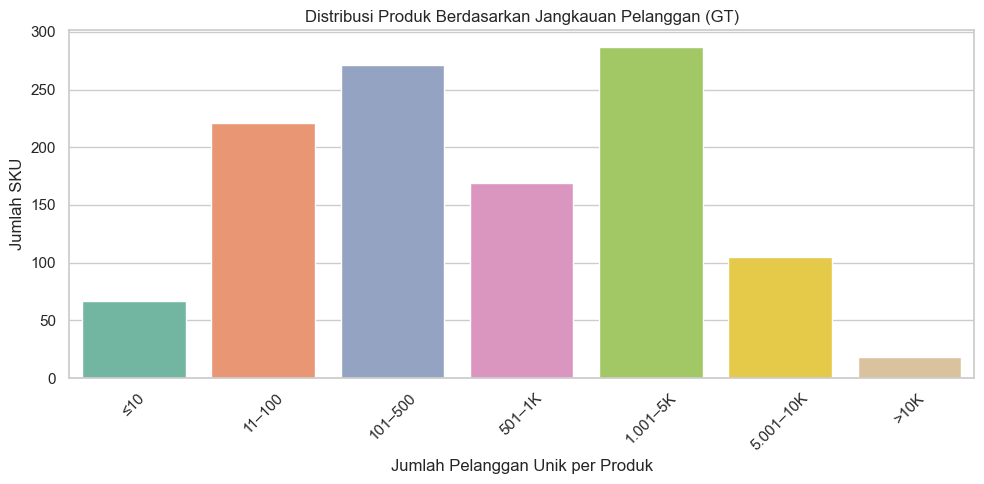

In [ ]:
bins = [0, 10, 100, 500, 1000, 5000, 10000, product_feat['n_cust'].max()]
labels = [
    '≤10',
    '11–100',
    '101–500',
    '501–1K',
    '1.001–5K',
    '5.001–10K',
    '>10K'
]

product_feat['cust_segment'] = pd.cut(
    product_feat['n_cust'],
    bins=bins,
    labels=labels
)

plt.figure(figsize=(10, 5))
sns.countplot(
    data=product_feat,
    x='cust_segment',
    order=labels,
    palette='Set2'
)

plt.title("Distribusi Produk Berdasarkan Jangkauan Pelanggan (GT)")
plt.xlabel("Jumlah Pelanggan Unik per Produk")
plt.ylabel("Jumlah SKU")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

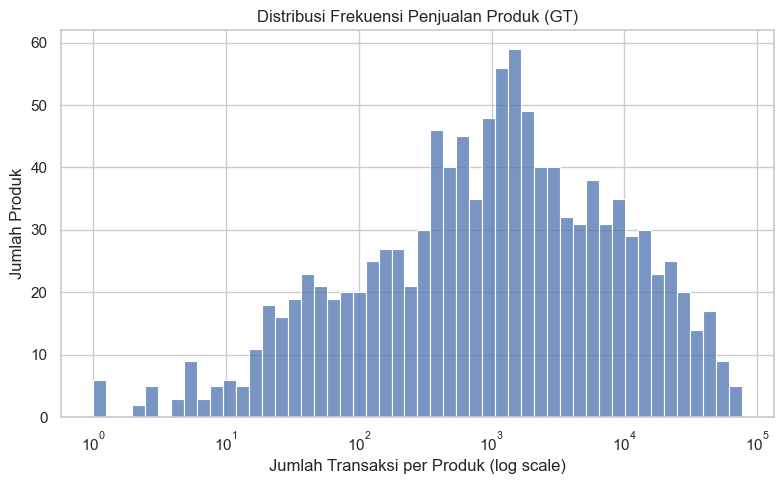

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    product_feat['total_sales_count'],
    bins=50,
    log_scale=True
)

plt.title("Distribusi Frekuensi Penjualan Produk (GT)")
plt.xlabel("Jumlah Transaksi per Produk (log scale)")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

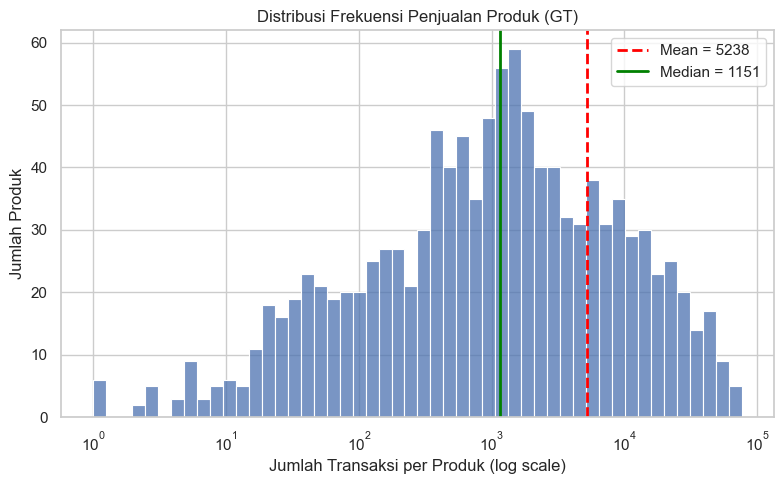

In [ ]:
mean_sales = product_feat['total_sales_count'].mean()
median_sales = product_feat['total_sales_count'].median()

plt.figure(figsize=(8, 5))
sns.histplot(
    product_feat['total_sales_count'],
    bins=50,
    log_scale=True
)

plt.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_sales:.0f}')
plt.axvline(median_sales, color='green', linestyle='-', linewidth=2, label=f'Median = {median_sales:.0f}')

plt.title("Distribusi Frekuensi Penjualan Produk (GT)")
plt.xlabel("Jumlah Transaksi per Produk (log scale)")
plt.ylabel("Jumlah Produk")
plt.legend()
plt.tight_layout()
plt.show()

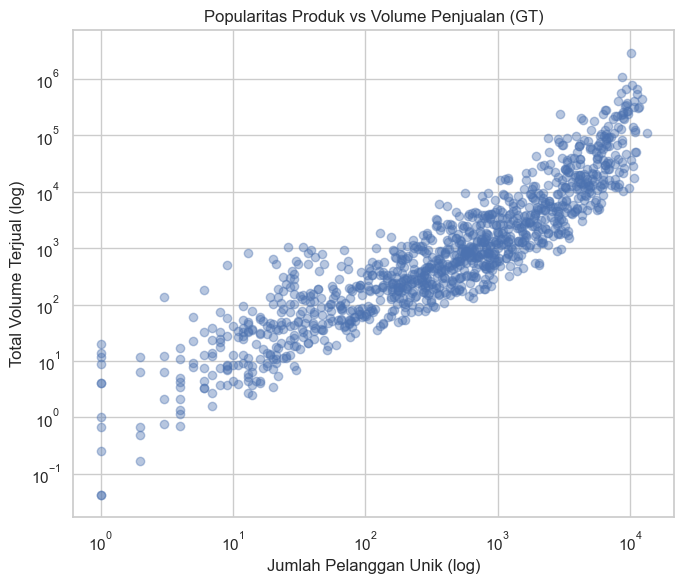

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(
    product_feat['n_cust'],
    product_feat['total_qty_sold'],
    alpha=0.4
)

plt.xscale('log')
plt.yscale('log')

plt.title("Popularitas Produk vs Volume Penjualan (GT)")
plt.xlabel("Jumlah Pelanggan Unik (log)")
plt.ylabel("Total Volume Terjual (log)")
plt.tight_layout()
plt.show()

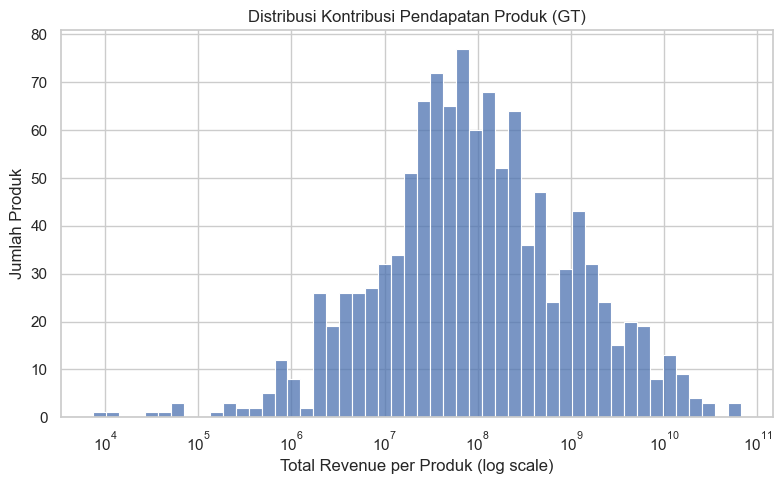

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    product_feat['total_revenue'],
    bins=50,
    log_scale=True
)

plt.title("Distribusi Kontribusi Pendapatan Produk (GT)")
plt.xlabel("Total Revenue per Produk (log scale)")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

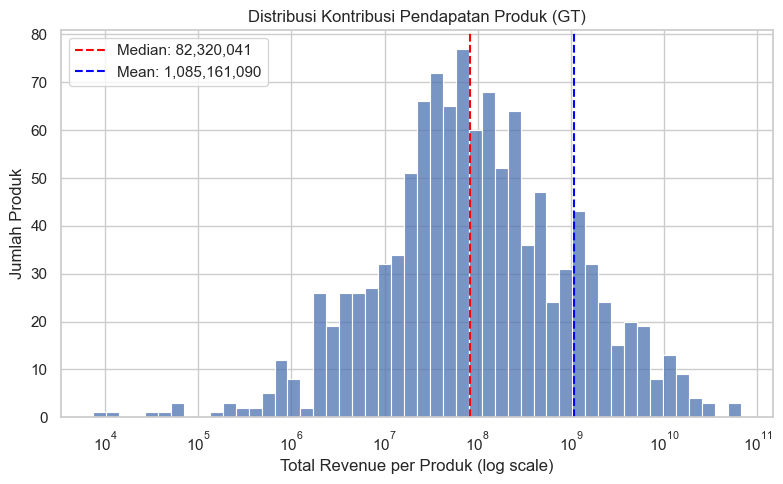

In [ ]:
median_rev = product_feat['total_revenue'].median()
mean_rev = product_feat['total_revenue'].mean()

plt.figure(figsize=(8, 5))
sns.histplot(
    product_feat['total_revenue'],
    bins=50,
    log_scale=True
)

plt.axvline(median_rev, color='red', linestyle='--', label=f'Median: {median_rev:,.0f}')
plt.axvline(mean_rev, color='blue', linestyle='--', label=f'Mean: {mean_rev:,.0f}')

plt.title("Distribusi Kontribusi Pendapatan Produk (GT)")
plt.xlabel("Total Revenue per Produk (log scale)")
plt.ylabel("Jumlah Produk")
plt.legend()
plt.tight_layout()
plt.show()

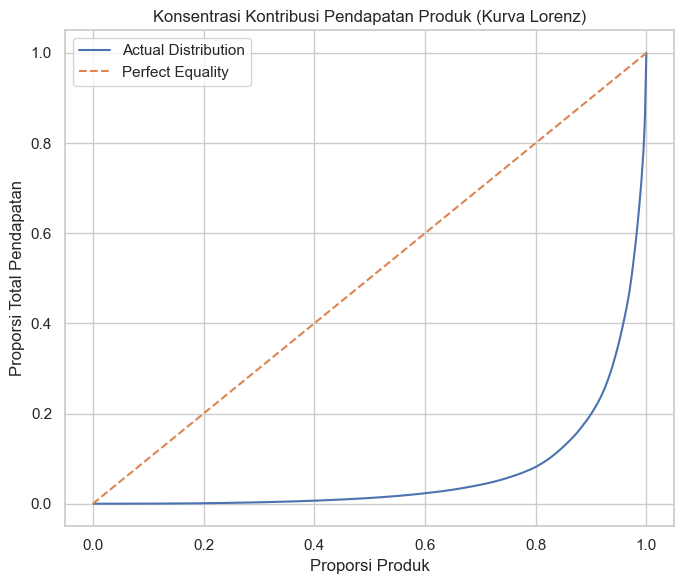

In [ ]:
revenue_sorted = np.sort(product_feat['total_revenue'])
cum_revenue = np.cumsum(revenue_sorted)
cum_revenue_share = cum_revenue / cum_revenue[-1]
cum_product_share = np.arange(1, len(cum_revenue) + 1) / len(cum_revenue)

plt.figure(figsize=(7, 6))
plt.plot(cum_product_share, cum_revenue_share, label='Actual Distribution')
plt.plot([0, 1], [0, 1], '--', label='Perfect Equality')

plt.title("Konsentrasi Kontribusi Pendapatan Produk (Kurva Lorenz)")
plt.xlabel("Proporsi Produk")
plt.ylabel("Proporsi Total Pendapatan")
plt.legend()
plt.tight_layout()
plt.show()

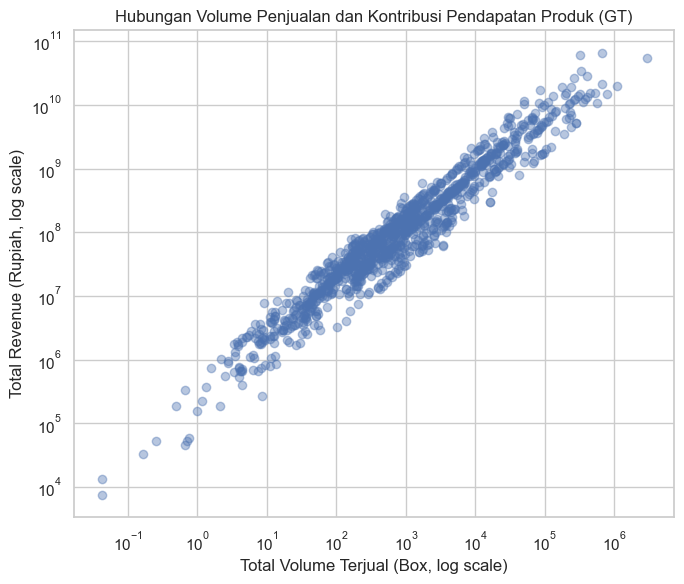

In [ ]:
plt.figure(figsize=(7, 6))

plt.scatter(
    product_feat['total_qty_sold'],
    product_feat['total_revenue'],
    alpha=0.4
)

plt.xscale('log')
plt.yscale('log')

plt.title("Hubungan Volume Penjualan dan Kontribusi Pendapatan Produk (GT)")
plt.xlabel("Total Volume Terjual (Box, log scale)")
plt.ylabel("Total Revenue (Rupiah, log scale)")
plt.tight_layout()
plt.show()

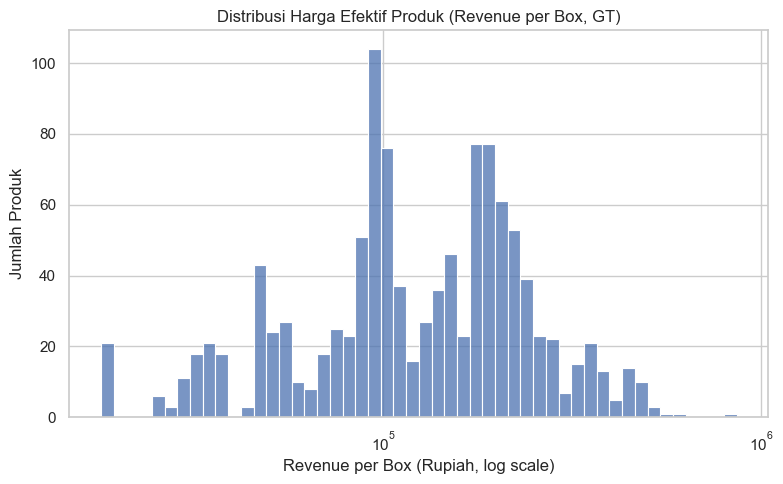

In [ ]:
product_feat['revenue_per_box'] = (
    product_feat['total_revenue'] / product_feat['total_qty_sold']
)

plt.figure(figsize=(8, 5))
sns.histplot(
    product_feat['revenue_per_box'],
    bins=50,
    log_scale=True
)

plt.title("Distribusi Harga Efektif Produk (Revenue per Box, GT)")
plt.xlabel("Revenue per Box (Rupiah, log scale)")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

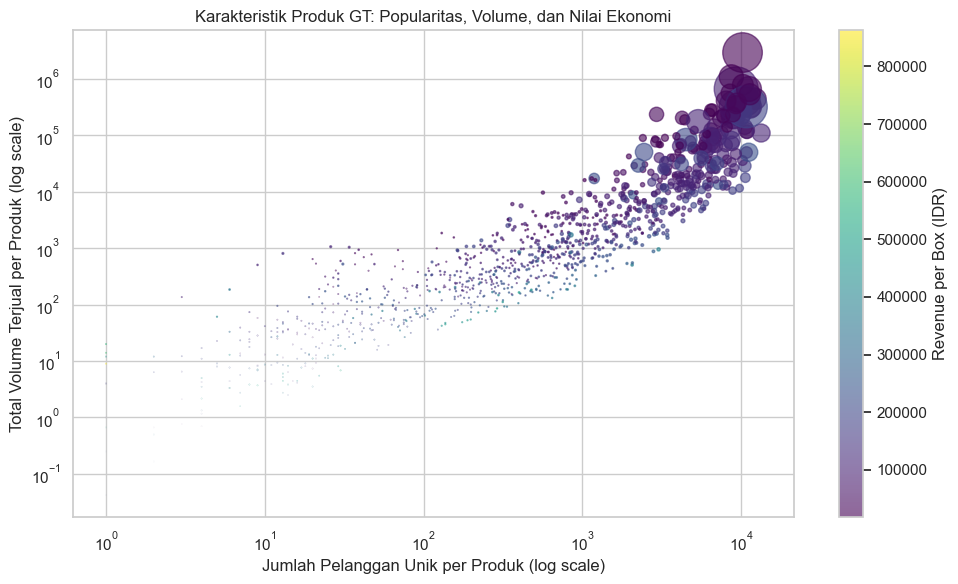

In [ ]:
product_feat['revenue_per_box'] = product_feat['total_revenue'] / product_feat['total_qty_sold']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    product_feat['n_cust'],
    product_feat['total_qty_sold'],
    s=product_feat['total_revenue'] / product_feat['total_revenue'].max() * 1000, 
    c=product_feat['revenue_per_box'],
    cmap='viridis',
    alpha=0.6
)

plt.xscale('log')
plt.yscale('log')
plt.colorbar(scatter, label='Revenue per Box (IDR)')

plt.title("Karakteristik Produk GT: Popularitas, Volume, dan Nilai Ekonomi")
plt.xlabel("Jumlah Pelanggan Unik per Produk (log scale)")
plt.ylabel("Total Volume Terjual per Produk (log scale)")
plt.tight_layout()
plt.show()

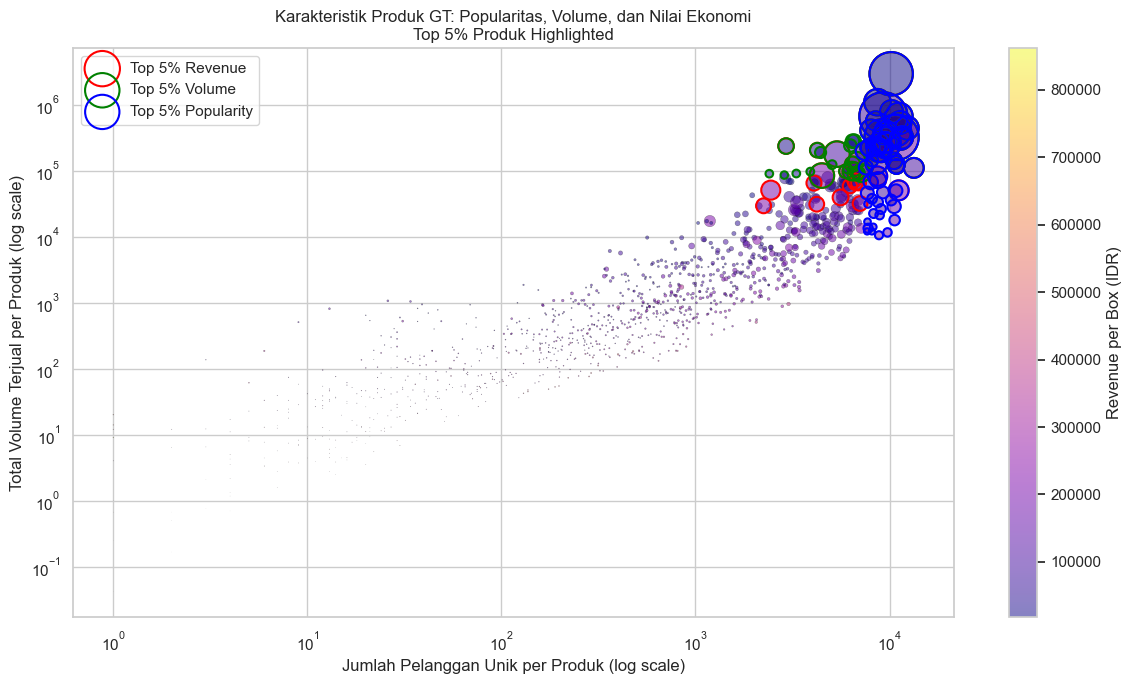

In [ ]:
top_revenue_thresh = np.percentile(product_feat['total_revenue'], 95)
top_qty_thresh = np.percentile(product_feat['total_qty_sold'], 95)
top_cust_thresh = np.percentile(product_feat['n_cust'], 95)

plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    product_feat['n_cust'],
    product_feat['total_qty_sold'],
    s=product_feat['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    c=product_feat['revenue_per_box'],
    cmap='plasma',
    alpha=0.5,
    edgecolor='k',
    linewidth=0.3
)

plt.xscale('log')
plt.yscale('log')

plt.colorbar(scatter, label='Revenue per Box (IDR)')

# Highlight top 5% revenue
top_revenue = product_feat[product_feat['total_revenue'] >= top_revenue_thresh]
plt.scatter(
    top_revenue['n_cust'],
    top_revenue['total_qty_sold'],
    s=top_revenue['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    facecolors='none',
    edgecolors='red',
    linewidths=1.5,
    label='Top 5% Revenue'
)

# Highlight top 5% volume
top_qty = product_feat[product_feat['total_qty_sold'] >= top_qty_thresh]
plt.scatter(
    top_qty['n_cust'],
    top_qty['total_qty_sold'],
    s=top_qty['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    facecolors='none',
    edgecolors='green',
    linewidths=1.5,
    label='Top 5% Volume'
)

# Highlight top 5% popularity (n_cust)
top_cust = product_feat[product_feat['n_cust'] >= top_cust_thresh]
plt.scatter(
    top_cust['n_cust'],
    top_cust['total_qty_sold'],
    s=top_cust['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    facecolors='none',
    edgecolors='blue',
    linewidths=1.5,
    label='Top 5% Popularity'
)

plt.title("Karakteristik Produk GT: Popularitas, Volume, dan Nilai Ekonomi\nTop 5% Produk Highlighted")
plt.xlabel("Jumlah Pelanggan Unik per Produk (log scale)")
plt.ylabel("Total Volume Terjual per Produk (log scale)")
plt.legend()
plt.tight_layout()
plt.show()

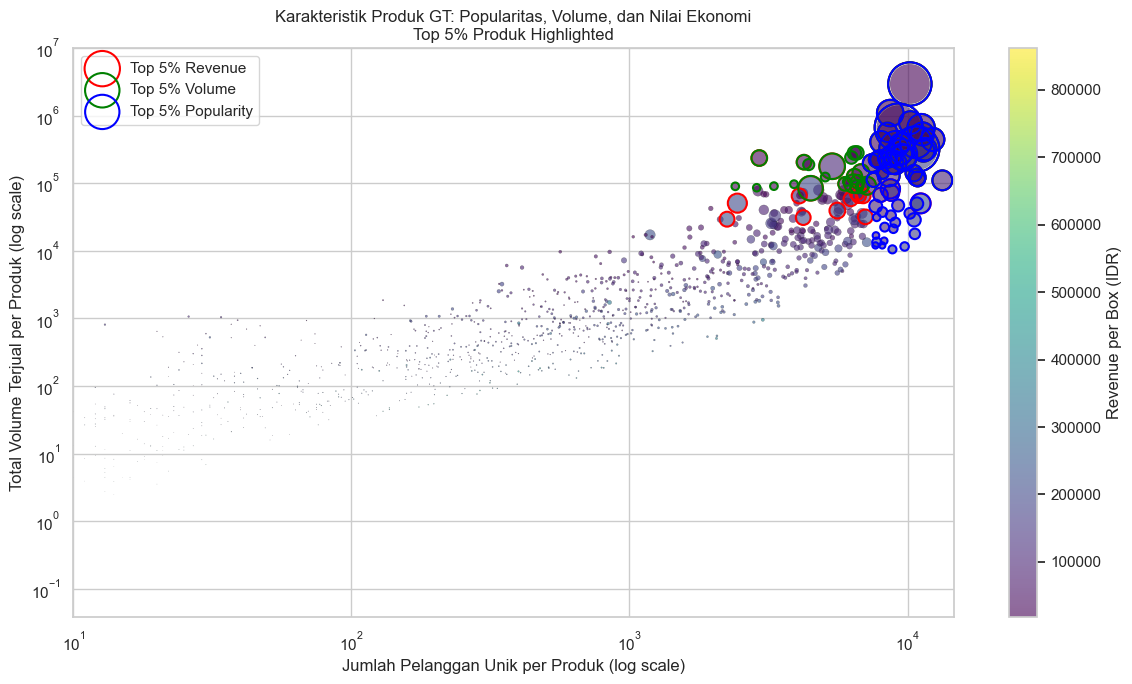

In [ ]:
plt.figure(figsize=(12, 7))

scatter = plt.scatter(
    product_feat['n_cust'],
    product_feat['total_qty_sold'],
    s=product_feat['total_revenue'] / product_feat['total_revenue'].max() * 1000,
    c=product_feat['revenue_per_box'],
    cmap='viridis',
    alpha=0.6,
    edgecolor='k',
    linewidth=0.2
)

plt.xscale('log')
plt.yscale('log')
plt.colorbar(scatter, label='Revenue per Box (IDR)')

# Highlight Top 5% Revenue
top_revenue = product_feat[product_feat['total_revenue'] >= top_revenue_thresh]
plt.scatter(
    top_revenue['n_cust'],
    top_revenue['total_qty_sold'],
    s=top_revenue['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    facecolors='none',
    edgecolors='red',
    linewidths=1.5,
    label='Top 5% Revenue'
)

# Highlight Top 5% Volume (qty sold)
top_qty = product_feat[product_feat['total_qty_sold'] >= top_qty_thresh]
plt.scatter(
    top_qty['n_cust'],
    top_qty['total_qty_sold'],
    s=top_qty['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    facecolors='none',
    edgecolors='green',
    linewidths=1.5,
    label='Top 5% Volume'
)

# Highlight Top 5% Popularity (n_cust)
top_cust = product_feat[product_feat['n_cust'] >= top_cust_thresh]
plt.scatter(
    top_cust['n_cust'],
    top_cust['total_qty_sold'],
    s=top_cust['total_revenue'] / product_feat['total_revenue'].max() * 1200,
    facecolors='none',
    edgecolors='blue',
    linewidths=1.5,
    label='Top 5% Popularity'
)

plt.xlim(10, product_feat['n_cust'].max()*1.1)
plt.ylim(product_feat['total_qty_sold'].min()*0.9, 1e7)

plt.title("Karakteristik Produk GT: Popularitas, Volume, dan Nilai Ekonomi\nTop 5% Produk Highlighted")
plt.xlabel("Jumlah Pelanggan Unik per Produk (log scale)")
plt.ylabel("Total Volume Terjual per Produk (log scale)")
plt.legend()
plt.tight_layout()
plt.show()